# 1. Importing Libraries

In this section, I will import the libraries that I will use in this project. I will import the following libraries:

- numpy for numerical computing
- pandas for data manipulation
- matplotlib for plotting
- seaborn for plotting
- sklearn for machine learning
- scipy for scientific computing
- statsmodels for statistical modeling

In [1131]:
# Imports
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 2. Loading the Data

In this section, I will load the data that I will use in this project. I will load the data from the CSV files using the pandas library. I will load the data into a pandas DataFrame.

In [1132]:
# Define path to data
file_path = "Data/"

# Load the data
crop_yield_df = pd.read_csv(file_path + "Crops production indicators - FAOSTAT_data_en_2-22-2024.csv")
fertiliser_use_df = pd.read_csv(file_path + "Fertilizers use - FAOSTAT_data_en_2-27-2024.csv")
land_temperature_change_df = pd.read_csv(file_path + "Land temperature change - FAOSTAT_data_en_2-27-2024.csv")
pesticides_use_df = pd.read_csv(file_path + "Pesticides use - FAOSTAT_data_en_2-27-2024.csv")
crop_value_df = pd.read_csv(file_path + "Food trade indicators - FAOSTAT_data_en_2-22-2024.csv")
land_use_df = pd.read_csv(file_path + "Land use - FAOSTAT_data_en_2-22-2024.csv",low_memory=False)

# 3. Data Preparation

In this section, I will prepare the data for analysis. For each of the dataframes, will perform the following steps:
- Explore the data
- Check for missing values
- Check for duplicate rows
- Drop unnecessary columns
- Group data if necessary to get totals and averages
- Rename value column to a more descriptive name for easier reference

## 3.1. Crop Yield Data

In [1133]:
# Display the first few rows of the crop yield data
crop_yield_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2000,2000,100 g/ha,8063,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2001,2001,100 g/ha,10067,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2002,2002,100 g/ha,16698,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2003,2003,100 g/ha,14580,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2004,2004,100 g/ha,13348,A,Official figure,NaN


In [1134]:
# Describe the crop yield data
crop_yield_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Value,Note
count,41649.000000,41649.0,41649.000000,41649.000000,4.164900e+04,0.0
mean,425.491777,5419.0,2010.900478,2010.900478,1.056544e+05,NaN
std,255.597188,0.0,6.614270,6.614270,1.688875e+05,NaN
min,4.000000,5419.0,2000.000000,2000.000000,0.000000e+00,NaN
25%,203.000000,5419.0,2005.000000,2005.000000,8.469000e+03,NaN
50%,417.000000,5419.0,2011.000000,2011.000000,3.828200e+04,NaN
75%,643.000000,5419.0,2017.000000,2017.000000,1.289290e+05,NaN
max,894.000000,5419.0,2022.000000,2022.000000,1.359231e+06,NaN


In [1135]:

# Print information about the crop yield data
crop_yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41649 entries, 0 to 41648
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       41649 non-null  object 
 1   Domain            41649 non-null  object 
 2   Area Code (M49)   41649 non-null  int64  
 3   Area              41649 non-null  object 
 4   Element Code      41649 non-null  int64  
 5   Element           41649 non-null  object 
 6   Item Code (CPC)   41649 non-null  object 
 7   Item              41649 non-null  object 
 8   Year Code         41649 non-null  int64  
 9   Year              41649 non-null  int64  
 10  Unit              41649 non-null  object 
 11  Value             41649 non-null  int64  
 12  Flag              41649 non-null  object 
 13  Flag Description  41649 non-null  object 
 14  Note              0 non-null      float64
dtypes: float64(1), int64(5), object(9)
memory usage: 4.8+ MB


In [1136]:
# Check for missing values
crop_yield_df.isnull().sum()

Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Item Code (CPC)         0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                   0
Flag                    0
Flag Description        0
Note                41649
dtype: int64

In [1137]:
# Check for duplicate rows
crop_yield_df.duplicated().sum()

0

In [1138]:
# Drop unnecessary columns
crop_yield_df = crop_yield_df.drop(columns=["Domain", "Domain Code", "Element Code", "Element", "Year Code", "Unit", "Flag", "Flag Description", "Note", "Item Code (CPC)", "Area Code (M49)"])

# Rename value column to yield in 100g/ha
crop_yield_df = crop_yield_df.rename(columns={"Value": "Yield in 100g/ha"})

# Display the first few rows of the crop yield data
crop_yield_df.head()

,Area,Item,Year,Yield in 100g/ha
0,Afghanistan,"Cereals, primary",2000,8063
1,Afghanistan,"Cereals, primary",2001,10067
2,Afghanistan,"Cereals, primary",2002,16698
3,Afghanistan,"Cereals, primary",2003,14580
4,Afghanistan,"Cereals, primary",2004,13348


## 3.2. Fertiliser Use Data

In [1139]:
# Display the first few rows of the fertiliser use data
fertiliser_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2002,2002,t,17900.0,I,Imputed value
1,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2003,2003,t,33200.0,I,Imputed value
2,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2004,2004,t,47700.0,I,Imputed value
3,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2004,2004,t,42300.0,I,Imputed value
4,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2005,2005,t,20577.0,I,Imputed value


In [1140]:

# Describe the fertiliser use data
fertiliser_use_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,17807.000000,17807.0,17807.000000,17807.000000,17807.000000,1.780700e+04
mean,428.095861,5157.0,4013.974224,2011.259224,2011.259224,2.124516e+05
std,252.862476,0.0,9.034514,5.443312,5.443312,1.408350e+06
min,4.000000,5157.0,4001.000000,2002.000000,2002.000000,0.000000e+00
25%,208.000000,5157.0,4004.000000,2007.000000,2007.000000,1.000000e+02
50%,414.000000,5157.0,4016.000000,2011.000000,2011.000000,3.584000e+03
75%,620.000000,5157.0,4022.000000,2016.000000,2016.000000,4.573800e+04
max,894.000000,5157.0,4030.000000,2021.000000,2021.000000,9.621329e+07


In [1141]:

# Print information about the fertiliser use data
fertiliser_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17807 entries, 0 to 17806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       17807 non-null  object 
 1   Domain            17807 non-null  object 
 2   Area Code (M49)   17807 non-null  int64  
 3   Area              17807 non-null  object 
 4   Element Code      17807 non-null  int64  
 5   Element           17807 non-null  object 
 6   Item Code         17807 non-null  int64  
 7   Item              17807 non-null  object 
 8   Year Code         17807 non-null  int64  
 9   Year              17807 non-null  int64  
 10  Unit              17807 non-null  object 
 11  Value             17807 non-null  float64
 12  Flag              17807 non-null  object 
 13  Flag Description  17807 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.9+ MB


In [1142]:

# Check for missing values
fertiliser_use_df.isnull().sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [1143]:

# Check for duplicate rows
fertiliser_use_df.duplicated().sum()

0

In [1144]:
# Drop unnecessary columns
fertiliser_use_df = fertiliser_use_df.drop(columns=["Domain", "Domain Code", "Element Code", "Element", "Year Code", "Unit", "Flag", "Flag Description", "Item Code", "Item", "Area Code (M49)"])

# Group data by country and year to get the total fertiliser use
fertiliser_use_df = fertiliser_use_df.groupby(["Area", "Year"]).sum().reset_index()

# Rename value column to total fertiliser use in tonnes
fertiliser_use_df = fertiliser_use_df.rename(columns={"Value": "Total Fertiliser Use in Tonnes"})

# Display the first few rows of the fertiliser use data
fertiliser_use_df.head()

,Area,Year,Total Fertiliser Use in Tonnes
0,Afghanistan,2002,17900.0
1,Afghanistan,2003,33200.0
2,Afghanistan,2004,90000.0
3,Afghanistan,2005,20577.0
4,Afghanistan,2006,68253.0


## 3.3. Land Temperature Change Data

In [1145]:
# Display the first few rows of the land temperature change data
land_temperature_change_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2000,2000,°c,0.618,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2001,2001,°c,0.365,E,Estimated value
2,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2002,2002,°c,1.655,E,Estimated value
3,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2003,2003,°c,0.997,E,Estimated value
4,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2004,2004,°c,1.883,E,Estimated value


In [1146]:
# Describe the land temperature change data
land_temperature_change_df.describe()

,Area Code (M49),Element Code,Months Code,Year Code,Year,Value
count,54810.000000,54810.000000,54810.000000,54810.000000,54810.000000,48255.000000
mean,434.977194,6674.500000,7018.000000,2011.021346,2011.021346,0.802197
std,253.978304,596.505442,1.414226,6.629795,6.629795,0.669648
min,4.000000,6078.000000,7016.000000,2000.000000,2000.000000,-4.176000
25%,214.000000,6078.000000,7017.000000,2005.000000,2005.000000,0.364000
50%,434.000000,6674.500000,7018.000000,2011.000000,2011.000000,0.643000
75%,654.000000,7271.000000,7019.000000,2017.000000,2017.000000,1.084000
max,894.000000,7271.000000,7020.000000,2022.000000,2022.000000,8.200000


In [1147]:
# Print information about the land temperature change data
land_temperature_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54810 entries, 0 to 54809
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       54810 non-null  object 
 1   Domain            54810 non-null  object 
 2   Area Code (M49)   54810 non-null  int64  
 3   Area              54810 non-null  object 
 4   Element Code      54810 non-null  int64  
 5   Element           54810 non-null  object 
 6   Months Code       54810 non-null  int64  
 7   Months            54810 non-null  object 
 8   Year Code         54810 non-null  int64  
 9   Year              54810 non-null  int64  
 10  Unit              54810 non-null  object 
 11  Value             48255 non-null  float64
 12  Flag              54810 non-null  object 
 13  Flag Description  54810 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 5.9+ MB


In [1148]:
# Filter land temperature change to get only meteorological year
land_temperature_change_df = land_temperature_change_df[land_temperature_change_df["Months"] == "Meteorological year"]

# Split df into two dataframes: one for temperature change and one for standard deviation
land_temperature_change_df = land_temperature_change_df[land_temperature_change_df["Element"] == "Temperature change"]
land_temperature_change_std_df = land_temperature_change_df[land_temperature_change_df["Element"] == "Standard Deviation"]

# Drop unnecessary columns
land_temperature_change_df = land_temperature_change_df.drop(columns=["Domain", "Domain Code", "Element Code", "Element", "Year Code", "Unit", "Flag", "Flag Description", "Months", "Months Code", "Area Code (M49)"])

# If all values for the country are missing, drop the country
land_temperature_change_df = land_temperature_change_df.groupby('Area').filter(lambda x: x[['Value']].notna().any().any())

# Impute missing values with the mean for the country
land_temperature_change_df['Value'] = land_temperature_change_df.groupby('Area',)['Value'].transform(lambda x: x.fillna(x.mean()))

In [1149]:
# Check for missing values
land_temperature_change_df.isnull().sum()

Area     0
Year     0
Value    0
dtype: int64

In [1150]:
# Check for duplicate rows
land_temperature_change_df.duplicated().sum()

0

In [1151]:
# Rename value column to temperature change in degrees celsius
land_temperature_change_df = land_temperature_change_df.rename(columns={"Value": "Temperature Change in Degrees Celsius"})

# Display the first few rows of the land temperature change data
land_temperature_change_df.head()

,Area,Year,Temperature Change in Degrees Celsius
184,Afghanistan,2000,0.993
185,Afghanistan,2001,1.311
186,Afghanistan,2002,1.365
187,Afghanistan,2003,0.587
188,Afghanistan,2004,1.373


## 3.4. Pesticides Use Data

In [1152]:
# Display the first few rows of the pesticides use data
pesticides_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2000,2000,t,307.98,E,Estimated value,NaN
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2000,2000,kg/ha,0.44,E,Estimated value,NaN
2,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),2000,2000,g/Int$,0.23,E,Estimated value,NaN
3,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2001,2001,t,319.38,E,Estimated value,NaN
4,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2001,2001,kg/ha,0.46,E,Estimated value,NaN


In [1153]:
# Describe the pesticides use data
pesticides_use_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,35202.000000,35202.000000,35202.000000,35202.000000,35202.000000,35202.000000
mean,424.550423,5158.978694,1340.576445,2010.510852,2010.510852,3855.186176
std,248.441525,4.950079,17.776129,6.341302,6.341302,24198.051890
min,8.000000,5157.000000,1309.000000,2000.000000,2000.000000,0.000000
25%,208.000000,5157.000000,1320.000000,2005.000000,2005.000000,0.430000
50%,418.000000,5157.000000,1345.000000,2011.000000,2011.000000,8.075000
75%,626.000000,5157.000000,1357.000000,2016.000000,2016.000000,366.012500
max,894.000000,5173.000000,1357.000000,2021.000000,2021.000000,719507.440000


In [1154]:
# Print information about the pesticides use data
pesticides_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35202 entries, 0 to 35201
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       35202 non-null  object 
 1   Domain            35202 non-null  object 
 2   Area Code (M49)   35202 non-null  int64  
 3   Area              35202 non-null  object 
 4   Element Code      35202 non-null  int64  
 5   Element           35202 non-null  object 
 6   Item Code         35202 non-null  int64  
 7   Item              35202 non-null  object 
 8   Year Code         35202 non-null  int64  
 9   Year              35202 non-null  int64  
 10  Unit              35202 non-null  object 
 11  Value             35202 non-null  float64
 12  Flag              35202 non-null  object 
 13  Flag Description  35202 non-null  object 
 14  Note              198 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 4.0+ MB


In [1155]:
# Get only the total pesticides used and only Agricultural Use
pesticides_use_df = pesticides_use_df[(pesticides_use_df["Item Code"] == 1357) & (pesticides_use_df["Element"] == "Agricultural Use")]
# Drop unnecessary columns
pesticides_use_df = pesticides_use_df.drop(columns=["Domain", "Domain Code", "Element Code", "Year Code", "Flag", "Flag Description", "Item Code", "Item", "Note", "Unit", "Element" , "Area Code (M49)" ])

# Check for missing values
pesticides_use_df.isnull().sum()

Area     0
Year     0
Value    0
dtype: int64

In [1156]:
# Check for duplicate rows
pesticides_use_df.duplicated().sum()

0

In [1157]:
# Rename value column to total pesticides use in tonnes
pesticides_use_df = pesticides_use_df.rename(columns={"Value": "Total Pesticides Use in Tonnes"})

# Display the first few rows of the pesticides use data
pesticides_use_df.head()

,Area,Year,Total Pesticides Use in Tonnes
0,Albania,2000,307.98
3,Albania,2001,319.38
6,Albania,2002,330.78
9,Albania,2003,342.17
12,Albania,2004,353.57


## 3.5. Crop Value Data

In [1158]:
# Display the first few rows of the crop value data
crop_value_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1991,1991,1000 USD,41600.0,A,Official figure,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1992,1992,1000 USD,25600.0,E,Estimated value,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1993,1993,1000 USD,40000.0,E,Estimated value,NaN
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1994,1994,1000 USD,25700.0,E,Estimated value,NaN
4,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1995,1995,1000 USD,37720.0,E,Estimated value,NaN


In [1159]:
# Describe the crop value data
crop_value_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Value,Note
count,141738.000000,141738.000000,141738.000000,141738.000000,1.417380e+05,0.0
mean,424.988359,5765.555010,2006.724273,2006.724273,4.572981e+05,NaN
std,253.512489,149.862005,9.168199,9.168199,1.876930e+06,NaN
min,4.000000,5622.000000,1991.000000,1991.000000,0.000000e+00,NaN
25%,204.000000,5622.000000,1999.000000,1999.000000,2.150000e+03,NaN
50%,414.000000,5622.000000,2007.000000,2007.000000,2.406200e+04,NaN
75%,643.000000,5922.000000,2015.000000,2015.000000,1.764239e+05,NaN
max,894.000000,5922.000000,2022.000000,2022.000000,8.355806e+07,NaN


In [1160]:
# Print information about the crop value data
crop_value_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141738 entries, 0 to 141737
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       141738 non-null  object 
 1   Domain            141738 non-null  object 
 2   Area Code (M49)   141738 non-null  int64  
 3   Area              141738 non-null  object 
 4   Element Code      141738 non-null  int64  
 5   Element           141738 non-null  object 
 6   Item Code (CPC)   141738 non-null  object 
 7   Item              141738 non-null  object 
 8   Year Code         141738 non-null  int64  
 9   Year              141738 non-null  int64  
 10  Unit              141738 non-null  object 
 11  Value             141738 non-null  float64
 12  Flag              141738 non-null  object 
 13  Flag Description  141738 non-null  object 
 14  Note              0 non-null       float64
dtypes: float64(2), int64(4), object(9)
memory usage: 16.2+ MB


In [1161]:
# Drop unnecessary columns
crop_value_df = crop_value_df.drop(columns=["Domain", "Domain Code",  "Year Code", "Flag", "Flag Description", "Note", "Unit", "Item Code (CPC)", "Area Code (M49)"])

# Check for missing values
crop_value_df.isnull().sum()

Area            0
Element Code    0
Element         0
Item            0
Year            0
Value           0
dtype: int64

In [1162]:
# Split the data into two dataframes: one for imports and one for exports
crop_value_imports_df = crop_value_df[crop_value_df["Element"] == "Import Value"]
crop_value_exports_df = crop_value_df[crop_value_df["Element"] == "Export Value"]

# Drop unnecessary columns
crop_value_imports_df = crop_value_imports_df.drop(columns=["Element", "Element Code"])
crop_value_exports_df = crop_value_exports_df.drop(columns=["Element", "Element Code"])

# Rename value column to crop value in 1000 US$
crop_value_imports_df = crop_value_imports_df.rename(columns={"Value": "Total Import Crop Value in 1000 US$"})
crop_value_exports_df = crop_value_exports_df.rename(columns={"Value": "Total Export Crop Value in 1000 US$"})

# Display the first few rows of the crop import data
crop_value_imports_df.head()

,Area,Item,Year,Total Import Crop Value in 1000 US$
0,Afghanistan,Cereals and Preparations,1991,41600.0
1,Afghanistan,Cereals and Preparations,1992,25600.0
2,Afghanistan,Cereals and Preparations,1993,40000.0
3,Afghanistan,Cereals and Preparations,1994,25700.0
4,Afghanistan,Cereals and Preparations,1995,37720.0


In [1163]:
# Display the first few rows of the crop import data
crop_value_exports_df.head()

,Area,Item,Year,Total Export Crop Value in 1000 US$
19,Afghanistan,Cereals and Preparations,2009,15.0
21,Afghanistan,Cereals and Preparations,2010,54.0
23,Afghanistan,Cereals and Preparations,2011,0.0
25,Afghanistan,Cereals and Preparations,2012,0.0
27,Afghanistan,Cereals and Preparations,2013,0.0


## 3.6. Land Use Data

In [1164]:
# Display the first few rows of the land use data
land_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1980,1980,1000 ha,65286.0,A,Official figure,NaN
1,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1981,1981,1000 ha,65286.0,A,Official figure,NaN
2,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1982,1982,1000 ha,65286.0,A,Official figure,NaN
3,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1983,1983,1000 ha,65286.0,A,Official figure,NaN
4,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1984,1984,1000 ha,65286.0,A,Official figure,NaN


In [1165]:
# Describe the land use data
land_use_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,97995.000000,97995.0,97995.000000,97995.000000,97995.000000,9.799500e+04
mean,430.530884,5110.0,6627.879984,2002.966988,2002.966988,2.044488e+04
std,255.076689,0.0,26.601230,11.828224,11.828224,9.502952e+04
min,4.000000,5110.0,6600.000000,1980.000000,1980.000000,0.000000e+00
25%,208.000000,5110.0,6602.000000,1993.000000,1993.000000,3.000000e+01
50%,426.000000,5110.0,6621.000000,2004.000000,2004.000000,7.037793e+02
75%,646.000000,5110.0,6650.000000,2013.000000,2013.000000,6.500000e+03
max,894.000000,5110.0,6695.000000,2021.000000,2021.000000,2.241237e+06


In [1166]:
# Print information about the land use data
land_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97995 entries, 0 to 97994
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       97995 non-null  object 
 1   Domain            97995 non-null  object 
 2   Area Code (M49)   97995 non-null  int64  
 3   Area              97995 non-null  object 
 4   Element Code      97995 non-null  int64  
 5   Element           97995 non-null  object 
 6   Item Code         97995 non-null  int64  
 7   Item              97995 non-null  object 
 8   Year Code         97995 non-null  int64  
 9   Year              97995 non-null  int64  
 10  Unit              97995 non-null  object 
 11  Value             97995 non-null  float64
 12  Flag              97995 non-null  object 
 13  Flag Description  97995 non-null  object 
 14  Note              1 non-null      object 
dtypes: float64(1), int64(5), object(9)
memory usage: 11.2+ MB


In [1167]:
# Filter to select only agricultural land
land_use_df = land_use_df[land_use_df["Item"] == "Agricultural land"]
# Drop unnecessary columns
land_use_df = land_use_df.drop(columns=["Domain", "Domain Code", "Year Code", "Flag", "Flag Description", "Note", "Element", "Element Code", "Item Code", "Item", "Unit", "Area Code (M49)"])

# Check for missing values
land_use_df.isnull().sum()

Area     0
Year     0
Value    0
dtype: int64

In [1168]:
# Check for duplicate rows
land_use_df.duplicated().sum()

0

In [1169]:
# Rename value column to agricultural land in hectares
land_use_df = land_use_df.rename(columns={"Value": "Agricultural Land in Hectares"})
# Display the first few rows of the land use data
land_use_df.head()

,Area,Year,Agricultural Land in Hectares
126,Afghanistan,1980,38049.0
127,Afghanistan,1981,38053.0
128,Afghanistan,1982,38054.0
129,Afghanistan,1983,38054.0
130,Afghanistan,1984,38054.0


# 3.7. Merging Data

In this section, I will merge all the dataframes into a single dataframe.


### Standardising Items
Combine different items so that they match across datasets, combining them to make a harmonised dataset. This will help in merging the datasets.

In [1170]:
# Views the unique items in the 'Item' column of the datasets
print("Unique Items in Crops Production Indicators:\n", crop_yield_df['Item'].unique())

Unique Items in Crops Production Indicators:
 ['Cereals, primary' 'Citrus Fruit, Total' 'Fibre Crops, Fibre Equivalent'
 'Fruit Primary' 'Oilcrops, Cake Equivalent' 'Oilcrops, Oil Equivalent'
 'Pulses, Total' 'Roots and Tubers, Total' 'Sugar Crops Primary'
 'Treenuts, Total' 'Vegetables Primary']


In [1171]:
print("Unique Items in Food Trade Indicators:\n", crop_value_exports_df['Item'].unique())

Unique Items in Food Trade Indicators:
 ['Cereals and Preparations' 'Fats and Oils (excluding Butter)'
 'Meat and Meat Preparations' 'Sugar and Honey' 'Fruit and Vegetables'
 'Dairy Products and Eggs' 'Alcoholic Beverages' 'Non-alcoholic Beverages'
 'Other food' 'Non-food' 'Non-edible Fats and Oils' 'Tobacco']


In [1172]:
# Create dictionaries to map the items to their respective categories
harmonized_mapping = {
    'Cereals, primary': 'Cereals and Grains',
    'Citrus Fruit, Total': 'Fruits and Vegetables',
    'Fibre Crops, Fibre Equivalent': 'Fibre and Textile Crops',
    'Fruit Primary': 'Fruits and Vegetables',
    'Oilcrops, Cake Equivalent': 'Nuts and Oilseeds',
    'Oilcrops, Oil Equivalent': 'Nuts and Oilseeds',
    'Pulses, Total': 'Miscellaneous',  # Generalized here to ensure it's not lost
    'Roots and Tubers, Total': 'Fruits and Vegetables',  # Grouped with Fruits and Vegetables for broader inclusion
    'Sugar Crops Primary': 'Sugar and Sweeteners',
    'Treenuts, Total': 'Nuts and Oilseeds',
    'Vegetables Primary': 'Fruits and Vegetables',
    'Cereals and Preparations': 'Cereals and Grains',
    'Fats and Oils (excluding Butter)': 'Nuts and Oilseeds',
    'Meat and Meat Preparations': 'Animal Products',
    'Sugar and Honey': 'Sugar and Sweeteners',
    'Fruit and Vegetables': 'Fruits and Vegetables',
    'Dairy Products and Eggs': 'Animal Products',
    'Alcoholic Beverages': 'Beverages and Alcoholic Products',
    'Non-alcoholic Beverages': 'Beverages and Alcoholic Products',
    'Other food': 'Miscellaneous',
    'Non-food': 'Miscellaneous',
    'Non-edible Fats and Oils': 'Miscellaneous',
    'Tobacco': 'Miscellaneous',
}

# Adds a Harmonised Item column to the datasets with the mapped items
crop_yield_df['Harmonised Item'] = crop_yield_df['Item'].map(harmonized_mapping)
crop_value_exports_df['Harmonised Item'] = crop_value_exports_df['Item'].map(harmonized_mapping)
crop_value_imports_df['Harmonised Item'] = crop_value_imports_df['Item'].map(harmonized_mapping)

# Drops unnecessary columns
crop_yield_df = crop_yield_df.drop(columns=['Item'])
crop_value_exports_df = crop_value_exports_df.drop(columns=['Item'])
crop_value_imports_df = crop_value_imports_df.drop(columns=['Item'])

# Group the data by Area, Year, and Harmonised Item
crop_yield_df = crop_yield_df.groupby(['Area', 'Year', 'Harmonised Item']).sum().reset_index()
crop_value_exports_df = crop_value_exports_df.groupby(['Area', 'Year', 'Harmonised Item']).sum().reset_index()
crop_value_imports_df = crop_value_imports_df.groupby(['Area', 'Year', 'Harmonised Item']).sum().reset_index()

# Display the first few rows of the datasets
print("Crops Production Indicators:\n", crop_yield_df.head())

Crops Production Indicators:
           Area  Year          Harmonised Item  Yield in 100g/ha
0  Afghanistan  2000       Cereals and Grains              8063
1  Afghanistan  2000  Fibre and Textile Crops              3990
2  Afghanistan  2000    Fruits and Vegetables            439986
3  Afghanistan  2000            Miscellaneous             10203
4  Afghanistan  2000        Nuts and Oilseeds             22442


In [1173]:
print("Food Trade Indicators (Exports):\n", crop_value_exports_df.head())
print("Food Trade Indicators (Imports):\n", crop_value_imports_df.head())

Food Trade Indicators (Exports):
           Area  Year        Harmonised Item  \
0  Afghanistan  1991  Fruits and Vegetables   
1  Afghanistan  1991          Miscellaneous   
2  Afghanistan  1991   Sugar and Sweeteners   
3  Afghanistan  1992  Fruits and Vegetables   
4  Afghanistan  1992          Miscellaneous   

   Total Export Crop Value in 1000 US$  
0                              51858.0  
1                              46385.0  
2                                  0.0  
3                              19062.0  
4                              23050.0  
Food Trade Indicators (Imports):
           Area  Year                   Harmonised Item  \
0  Afghanistan  1991                   Animal Products   
1  Afghanistan  1991  Beverages and Alcoholic Products   
2  Afghanistan  1991                Cereals and Grains   
3  Afghanistan  1991             Fruits and Vegetables   
4  Afghanistan  1991                     Miscellaneous   

   Total Import Crop Value in 1000 US$  
0            

### 3.7.2 Merging Data

In this section, I will merge all the dataframes into a single dataframe. I will merge the dataframes on the following columns:
- Area
- Area Code (M49)
- Year
- Harmonised Item (for Crop Yield and Crop Value Data)

In [1174]:
# Merge all the dataframes into a single dataframe
merged_df = crop_yield_df.merge(crop_value_exports_df, how="inner", left_on=["Area", "Year", 'Harmonised Item'], right_on=["Area", "Year", 'Harmonised Item'])
merged_df = merged_df.merge(crop_value_imports_df, how="inner", left_on=["Area", "Year", 'Harmonised Item'], right_on=["Area", "Year", 'Harmonised Item'])
merged_df.head()
merged_df = merged_df.merge(land_temperature_change_df, how="inner", left_on=["Area", "Year"], right_on=["Area", "Year"])
merged_df = merged_df.merge(pesticides_use_df, how="inner", left_on=["Area", "Year"], right_on=["Area", "Year"])
merged_df = merged_df.merge(land_use_df, how="inner", left_on=["Area", "Year"], right_on=["Area", "Year"])
merged_df = merged_df.merge(fertiliser_use_df, how="inner", left_on=["Area", "Year"], right_on=["Area", "Year"])

In [1175]:
# Describe the merged dataframe
merged_df.describe()

,Year,Yield in 100g/ha,Total Export Crop Value in 1000 US$,Total Import Crop Value in 1000 US$,Temperature Change in Degrees Celsius,Total Pesticides Use in Tonnes,Agricultural Land in Hectares,Total Fertiliser Use in Tonnes
count,8446.000000,8.446000e+03,8.446000e+03,8.446000e+03,8446.00000,8446.000000,8446.000000,8.446000e+03
mean,2010.036112,2.358119e+05,1.073059e+06,1.007354e+06,1.03731,19399.733657,27224.240531,2.218370e+06
std,5.297832,3.112636e+05,3.836826e+06,2.921372e+06,0.52415,57742.102321,61099.685370,7.493214e+06
min,2002.000000,4.800000e+01,0.000000e+00,2.450000e+02,-0.47800,0.660000,1.500000,0.000000e+00
25%,2006.000000,1.604575e+04,9.930750e+03,5.411300e+04,0.69200,573.260000,1698.775000,3.819700e+04
50%,2009.000000,4.073150e+04,9.195534e+04,1.998879e+05,0.95100,2358.010000,5296.000000,2.379890e+05
75%,2014.000000,4.554350e+05,5.130612e+05,7.387773e+05,1.31100,10549.000000,24967.370000,1.038263e+06
max,2021.000000,1.554874e+06,7.292108e+07,5.258387e+07,3.55000,472977.150000,447000.000000,9.665856e+07


In [1176]:
# Show the shape of the merged dataframe (8446, 10)
merged_df.shape

(8446, 10)

In [1177]:
# Count the number of countries in the merged dataframe (156)
merged_df['Area'].nunique()

156

In [1178]:
# Count number of years in the merged dataframe (20)
merged_df['Year'].nunique()

20

# 4. Exploratory Data Analysis 

In this section, I will perform exploratory data analysis on the merged data. I will explore the following:
- Crop Yield Analysis
- Fertiliser Use Analysis
- Land Temperature Change Analysis
- Pesticides Use Analysis
- Crop Value Analysis
- Land Use Analysis
- Correlation Analysis

## 4.1 Crop Yield Analysis

In this section, I will perform exploratory data analysis on the crop yield data. I will explore the following:
- Mean crop yield over the years for all countries by crop type
- Crop yield distribution (using log scale and non-zero values only)
- Crop yield correlation with export crop value
- Frequency of harmonised items

In [1179]:
# # Prepare the data for analysis
crop_yield_mean = crop_yield_df.groupby(['Year', 'Harmonised Item'])['Yield in 100g/ha'].mean()
crop_yield_total = crop_yield_df.groupby(['Year', 'Harmonised Item'])['Yield in 100g/ha'].sum()
non_zero_crop_yield = crop_yield_df[crop_yield_df['Yield in 100g/ha'] > 0]

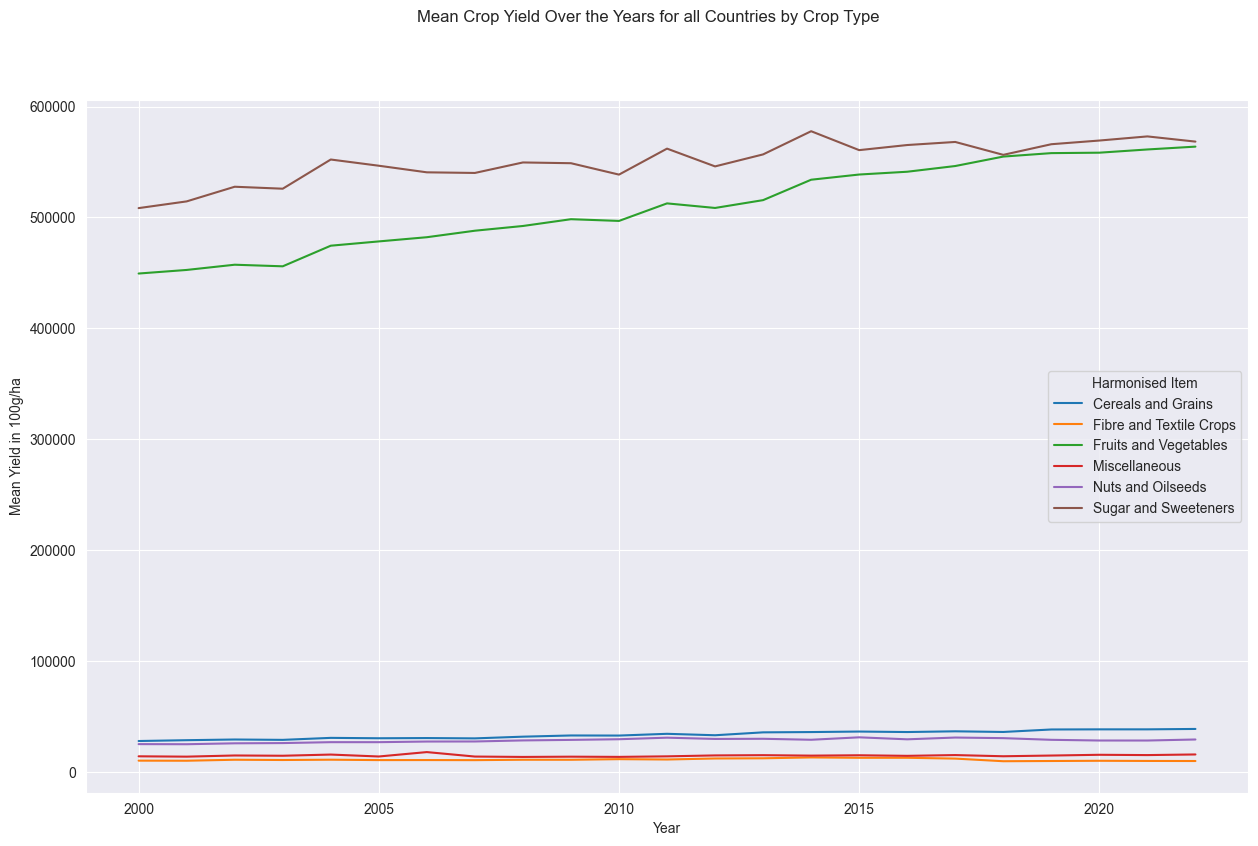

In [1180]:
# Plot the mean crop yield over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Mean Crop Yield Over the Years for all Countries by Crop Type")

crop_yield_mean.unstack().plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Yield in 100g/ha")

plt.show()

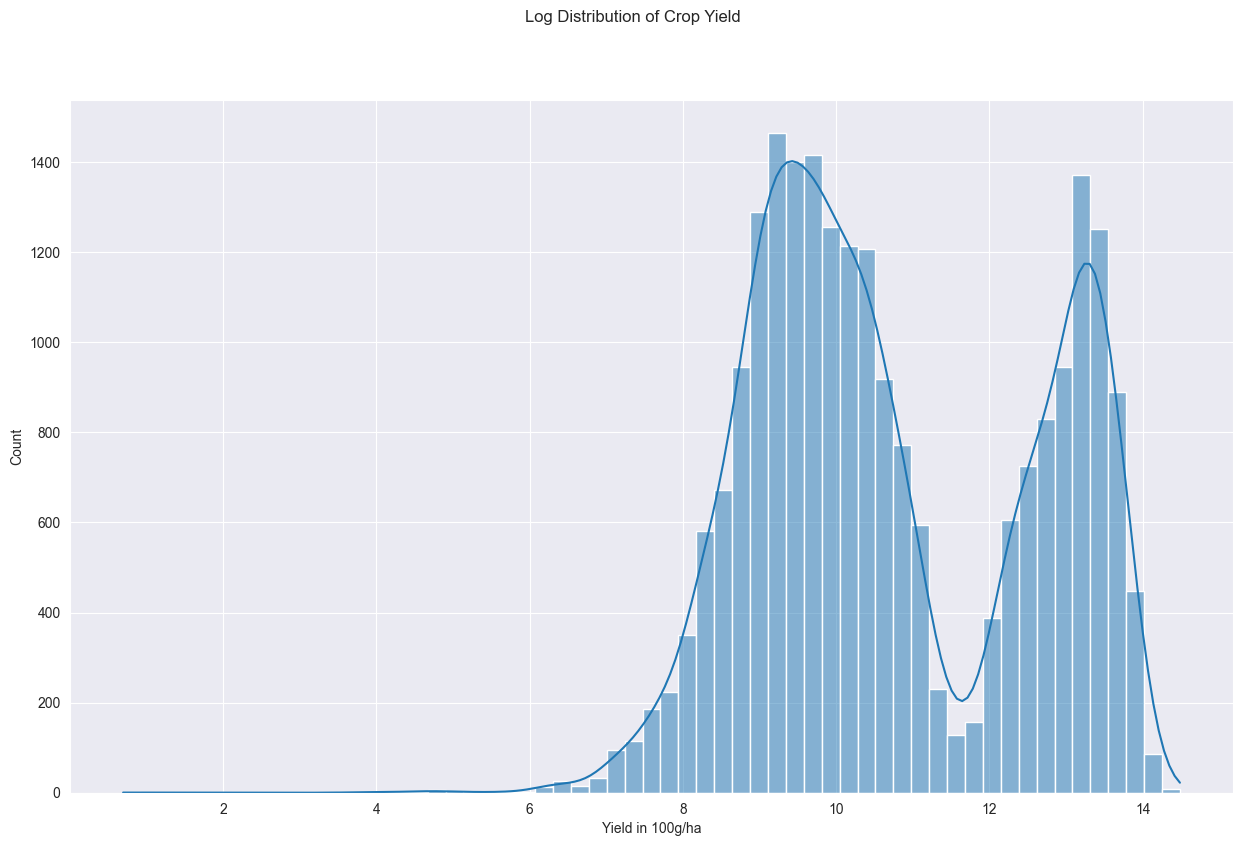

,Year,Yield in 100g/ha,Total Export Crop Value in 1000 US$,Total Import Crop Value in 1000 US$,Temperature Change in Degrees Celsius,Total Pesticides Use in Tonnes,Agricultural Land in Hectares,Total Fertiliser Use in Tonnes
count,8446.000000,8.446000e+03,8.446000e+03,8.446000e+03,8446.00000,8446.000000,8446.000000,8.446000e+03
mean,2010.036112,2.358119e+05,1.073059e+06,1.007354e+06,1.03731,19399.733657,27224.240531,2.218370e+06
std,5.297832,3.112636e+05,3.836826e+06,2.921372e+06,0.52415,57742.102321,61099.685370,7.493214e+06
min,2002.000000,4.800000e+01,0.000000e+00,2.450000e+02,-0.47800,0.660000,1.500000,0.000000e+00
25%,2006.000000,1.604575e+04,9.930750e+03,5.411300e+04,0.69200,573.260000,1698.775000,3.819700e+04
50%,2009.000000,4.073150e+04,9.195534e+04,1.998879e+05,0.95100,2358.010000,5296.000000,2.379890e+05
75%,2014.000000,4.554350e+05,5.130612e+05,7.387773e+05,1.31100,10549.000000,24967.370000,1.038263e+06
max,2021.000000,1.554874e+06,7.292108e+07,5.258387e+07,3.55000,472977.150000,447000.000000,9.665856e+07


In [1181]:
# Plot the distribution of crop yield
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Log Distribution of Crop Yield")

sns.histplot(np.log1p(non_zero_crop_yield['Yield in 100g/ha']), kde=True, ax=ax)
plt.xlabel("Yield in 100g/ha")

plt.show()
merged_df.describe()

C:\Users\tomna\AppData\Local\Temp\ipykernel_68052\2212424403.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')


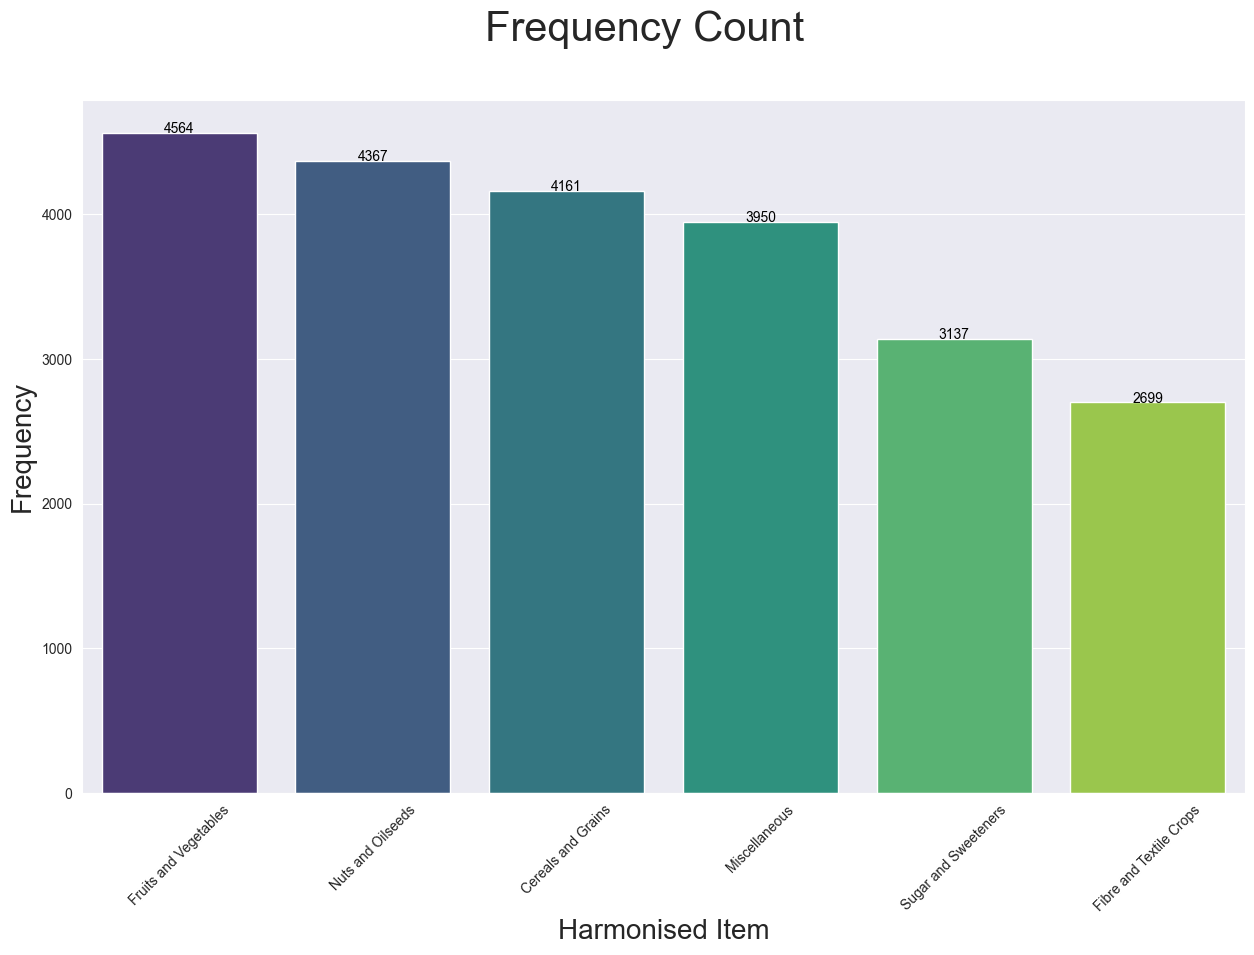

In [1182]:
# Count the values and reset the index
temp = crop_yield_df['Harmonised Item'].value_counts().reset_index()
temp.columns = ['Harmonised Item', 'Frequency']  # Correctly naming the columns for clarity

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Frequency Count', size=30)

# Using renamed columns
graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')

# Adding text labels on bars
for index, row in temp.iterrows():
    graph.text(index, row['Frequency'], row['Frequency'], color='black', ha="center")

plt.xlabel('Harmonised Item', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(rotation=45) # Rotating the x-axis labels for better visibility

plt.show()

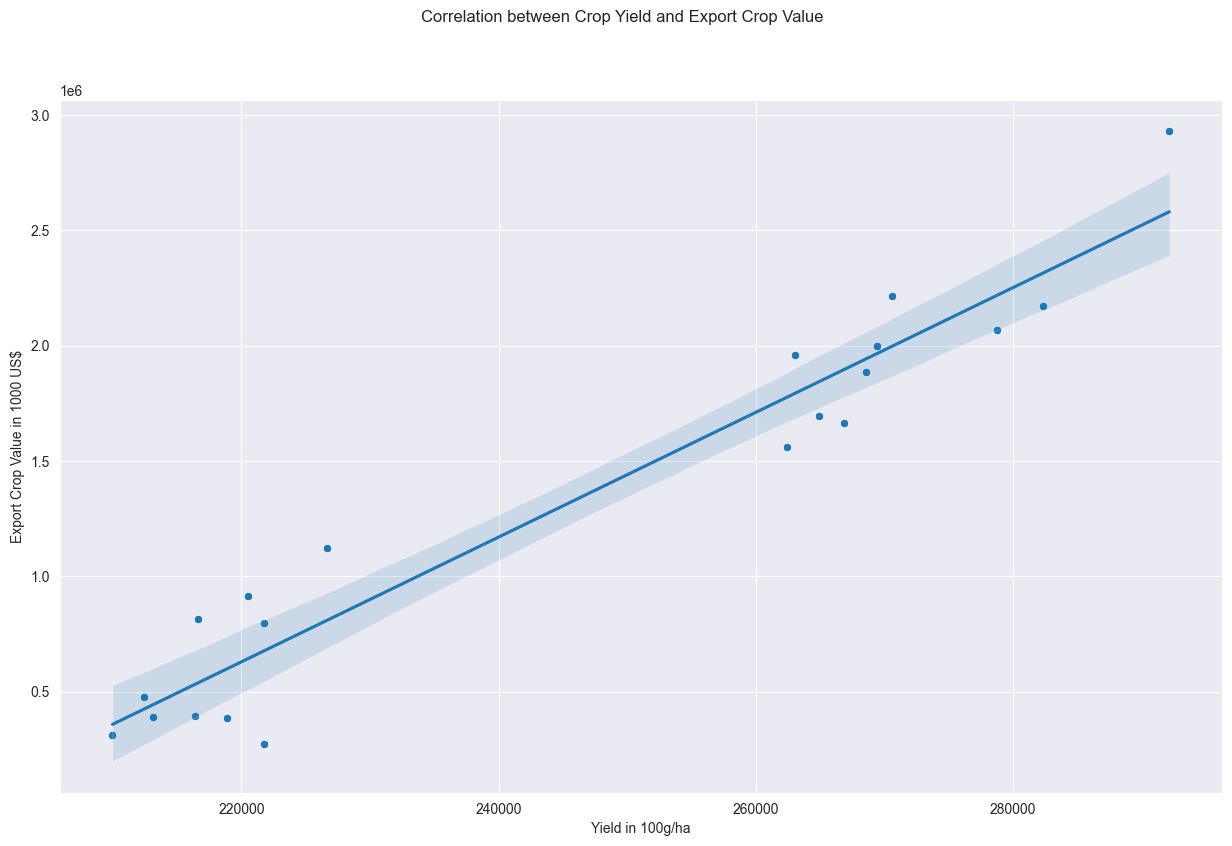

In [1183]:
# Plot the correlation between crop yield and export crop value
fig, ax = plt.subplots(figsize=(15,9))
temp = merged_df.groupby('Year').agg({
    'Yield in 100g/ha': 'mean',
    'Total Export Crop Value in 1000 US$': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

plt.suptitle("Correlation between Crop Yield and Export Crop Value")

sns.scatterplot(data=temp, x='Yield in 100g/ha', y='Total Export Crop Value in 1000 US$', ax=ax)
sns.regplot(data=temp, x='Yield in 100g/ha', y='Total Export Crop Value in 1000 US$', ax=ax, scatter=False) # Line of best fit
plt.xlabel("Yield in 100g/ha")
plt.ylabel("Export Crop Value in 1000 US$")
plt.show()

## 4.2 Fertiliser Use Analysis

In this section, I will perform exploratory data analysis on the fertiliser use data. I will explore the following:
- Mean fertiliser use over the years for all countries
- Fertiliser use distribution (using log scale and non-zero values only)
- Fertiliser use correlation with export crop value

In [1184]:
# Prepare the data for analysis
fertiliser_use_mean = fertiliser_use_df.groupby('Year')['Total Fertiliser Use in Tonnes'].mean()
fertiliser_use_total = fertiliser_use_df.groupby('Year')['Total Fertiliser Use in Tonnes'].sum()

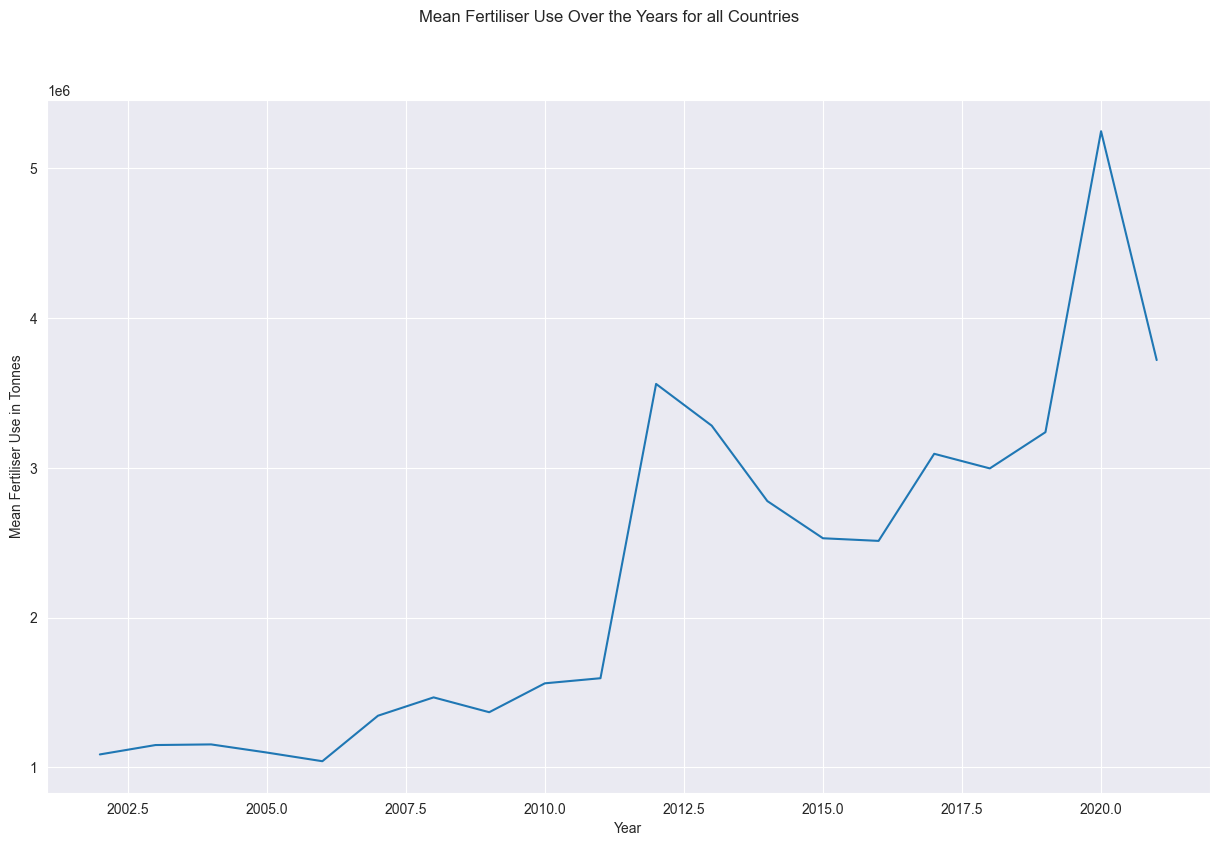

In [1185]:
# Plot the mean fertiliser use over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Mean Fertiliser Use Over the Years for all Countries")

fertiliser_use_mean.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Fertiliser Use in Tonnes")

plt.show()

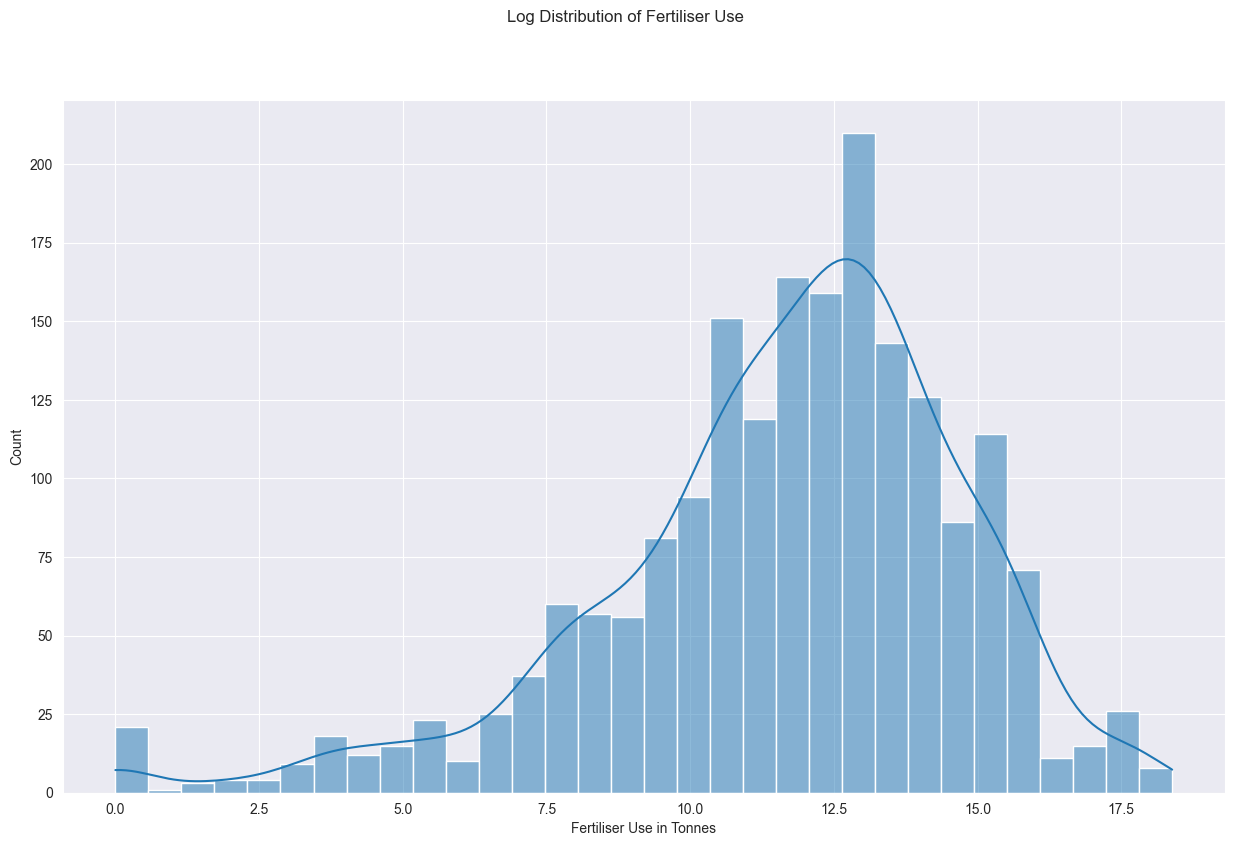

In [1186]:
# Plot the distribution of fertiliser use
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Log Distribution of Fertiliser Use")

sns.histplot(np.log1p(fertiliser_use_df['Total Fertiliser Use in Tonnes']), kde=True, ax=ax)
plt.xlabel("Fertiliser Use in Tonnes")

plt.show()

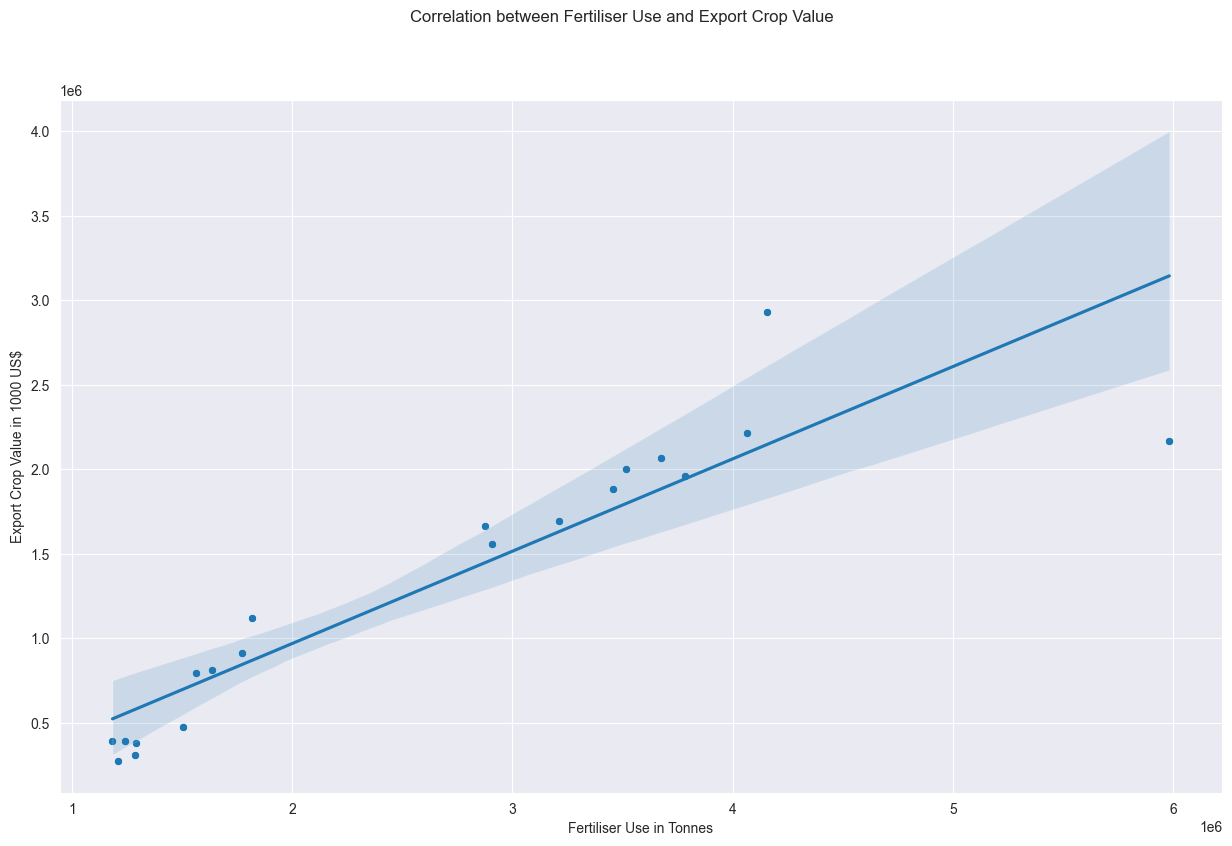

In [1187]:
# Plot the correlation between fertiliser use and export crop value
fig, ax = plt.subplots(figsize=(15,9))
temp = merged_df.groupby('Year').agg({
    'Total Fertiliser Use in Tonnes': 'mean',
    'Total Export Crop Value in 1000 US$': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

plt.suptitle("Correlation between Fertiliser Use and Export Crop Value")

sns.scatterplot(data=temp, x='Total Fertiliser Use in Tonnes', y='Total Export Crop Value in 1000 US$', ax=ax)
sns.regplot(data=temp, x='Total Fertiliser Use in Tonnes', y='Total Export Crop Value in 1000 US$', ax=ax, scatter=False) # Line of best fit
plt.xlabel("Fertiliser Use in Tonnes")
plt.ylabel("Export Crop Value in 1000 US$")
plt.show()

C:\Users\tomna\AppData\Local\Temp\ipykernel_68052\2212424403.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')


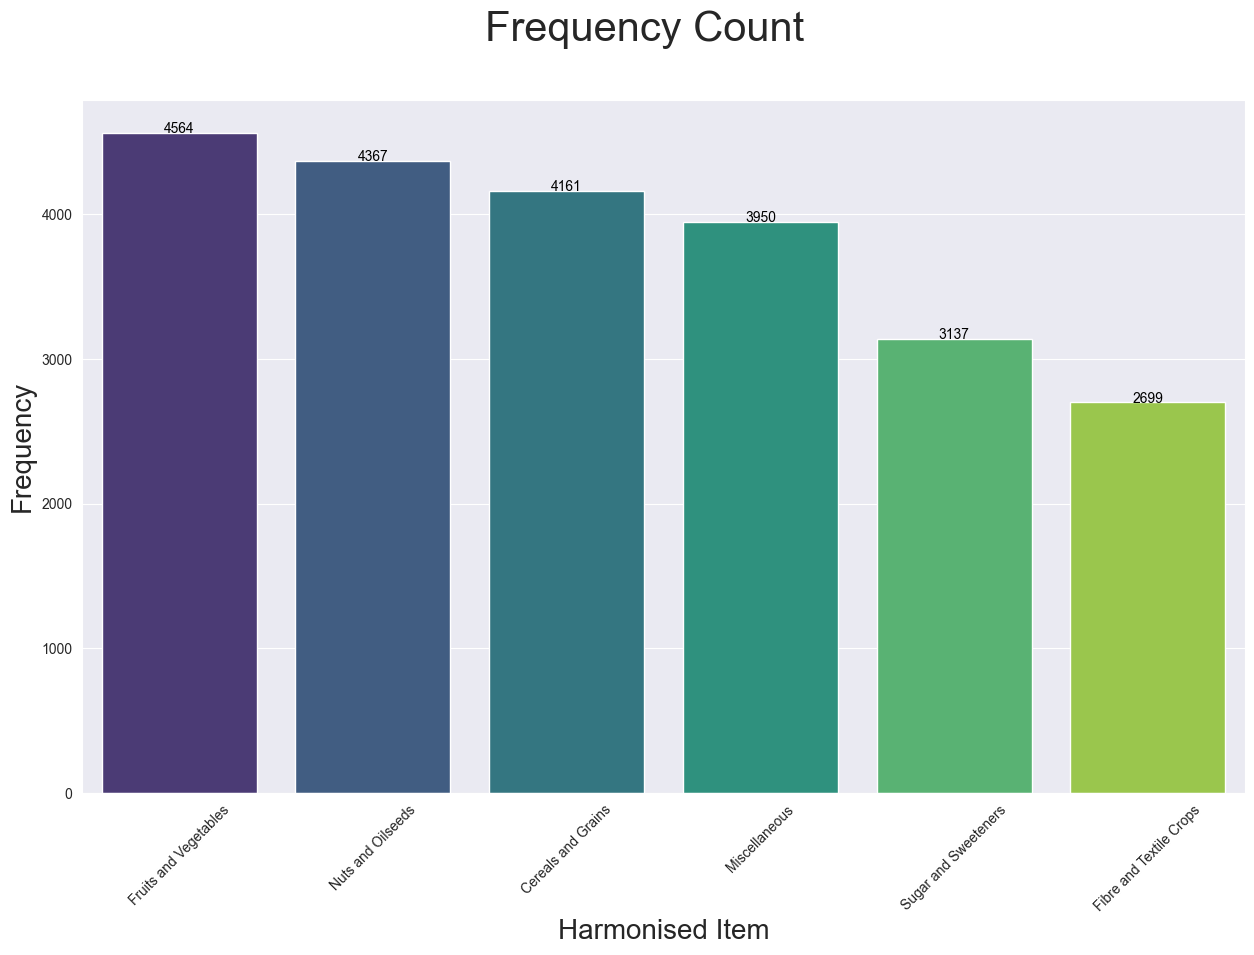

In [1188]:
# Count the values and reset the index
temp = crop_yield_df['Harmonised Item'].value_counts().reset_index()
temp.columns = ['Harmonised Item', 'Frequency']  # Correctly naming the columns for clarity

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Frequency Count', size=30)

# Using renamed columns
graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')

# Adding text labels on bars
for index, row in temp.iterrows():
    graph.text(index, row['Frequency'], row['Frequency'], color='black', ha="center")

plt.xlabel('Harmonised Item', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(rotation=45) # Rotating the x-axis labels for better visibility

plt.show()

## 4.3 Land Temperature Change Analysis

In this section, I will perform exploratory data analysis on the land temperature change data. I will explore the following:
- Mean land temperature change over the years for all countries
- Land temperature change distribution
- Land temperature change correlation with export crop value

In [1189]:
# Prepare the data for analysis
land_temperature_change_mean = land_temperature_change_df.groupby('Year')['Temperature Change in Degrees Celsius'].mean()
land_temperature_change_total = land_temperature_change_df.groupby('Year')['Temperature Change in Degrees Celsius'].sum()

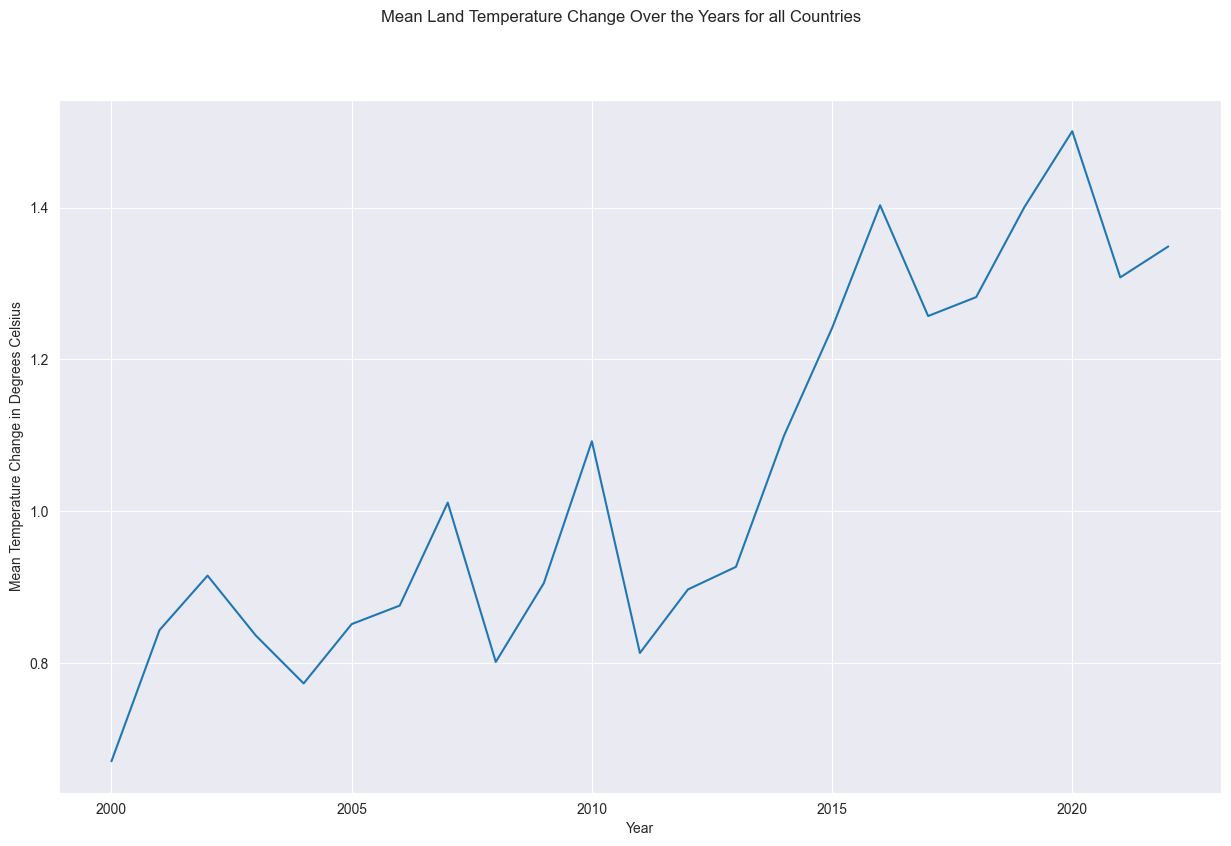

In [1190]:
# Plot the mean land temperature change over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Mean Land Temperature Change Over the Years for all Countries")

land_temperature_change_mean.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Temperature Change in Degrees Celsius")

plt.show()

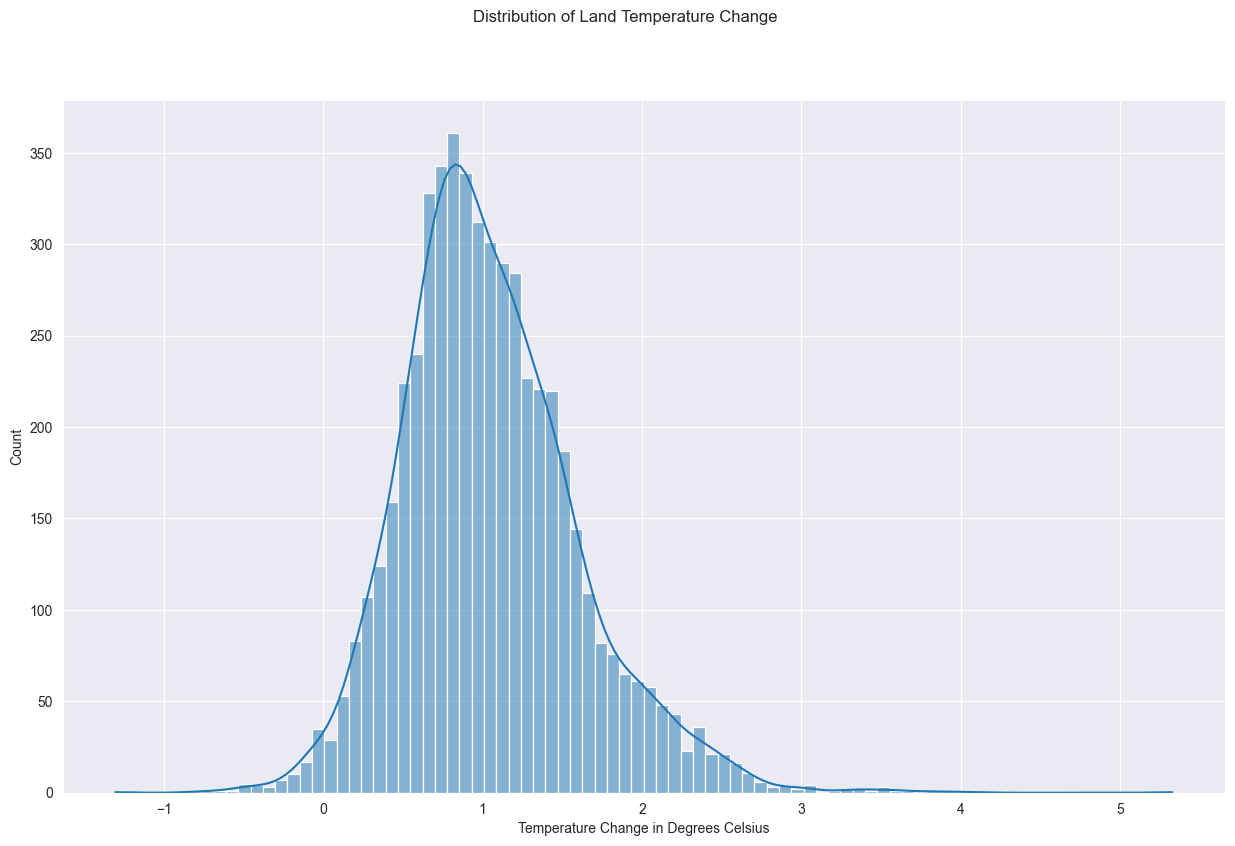

In [1191]:
# Plot the distribution of land temperature change
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Distribution of Land Temperature Change")

sns.histplot(land_temperature_change_df['Temperature Change in Degrees Celsius'], kde=True, ax=ax)
plt.xlabel("Temperature Change in Degrees Celsius")

plt.show()

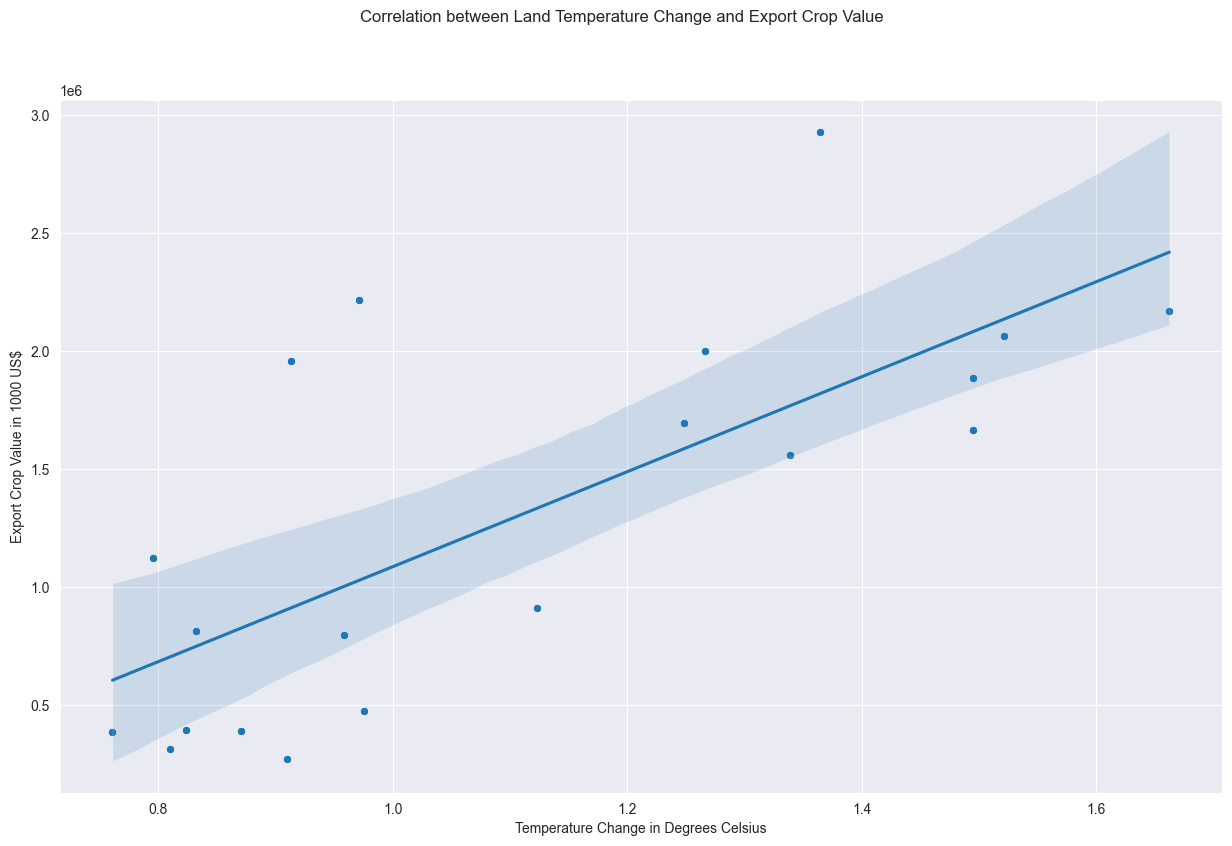

In [1192]:
# Plot the correlation between land temperature change and export crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Land Temperature Change and Export Crop Value")
temp = merged_df.groupby('Year').agg({
    'Temperature Change in Degrees Celsius': 'mean',
    'Total Export Crop Value in 1000 US$': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

sns.scatterplot(data=temp, x='Temperature Change in Degrees Celsius', y='Total Export Crop Value in 1000 US$', ax=ax)
sns.regplot(data=temp, x='Temperature Change in Degrees Celsius', y='Total Export Crop Value in 1000 US$', ax=ax, scatter=False) # Line of best fit
plt.xlabel("Temperature Change in Degrees Celsius")
plt.ylabel("Export Crop Value in 1000 US$")
plt.show()

## 4.4 Pesticides Use Analysis

In this section, I will perform exploratory data analysis on the pesticides use data. I will explore the following:
- Mean pesticides use over the years for all countries
- Distribution of pesticides use
- Pesticides use correlation with crop yield

In [1193]:
# Prepare the data for analysis
pesticides_use_mean = pesticides_use_df.groupby('Year')['Total Pesticides Use in Tonnes'].mean()
pesticides_use_total = pesticides_use_df.groupby('Year')['Total Pesticides Use in Tonnes'].sum()

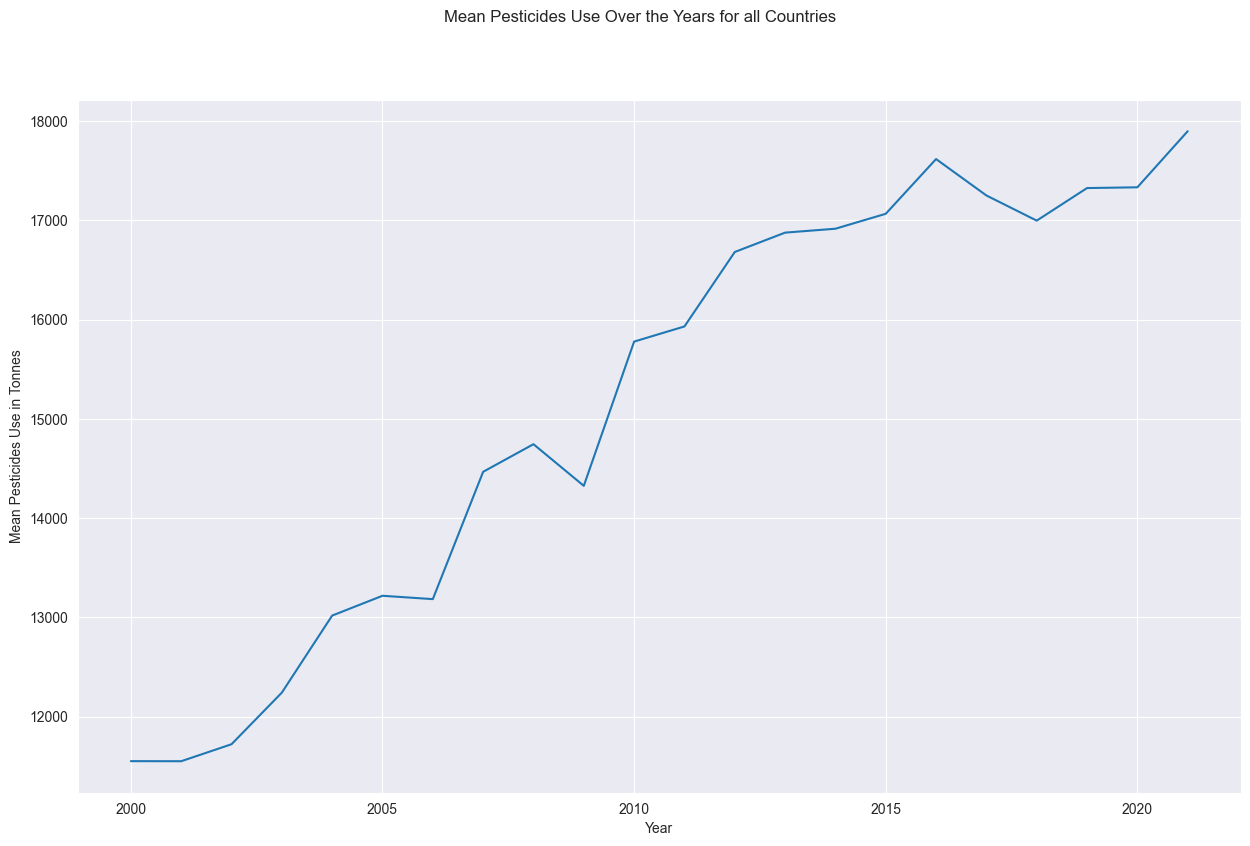

In [1194]:
# Plot the mean pesticides use over the years
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Mean Pesticides Use Over the Years for all Countries")

pesticides_use_mean.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Pesticides Use in Tonnes")

plt.show()

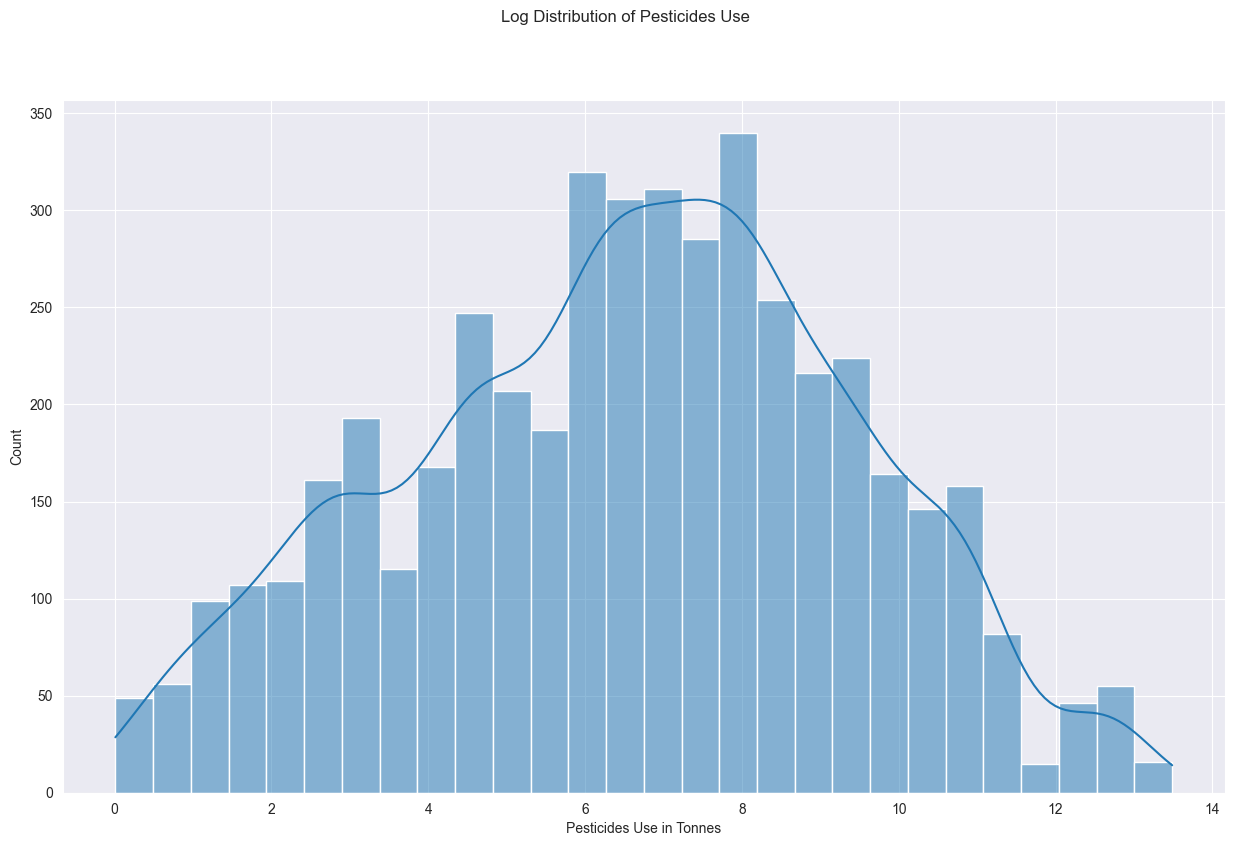

In [1195]:
# Plot the distribution of pesticides use
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Log Distribution of Pesticides Use")

sns.histplot(np.log1p(pesticides_use_df['Total Pesticides Use in Tonnes']), kde=True, ax=ax)
plt.xlabel("Pesticides Use in Tonnes")

plt.show()

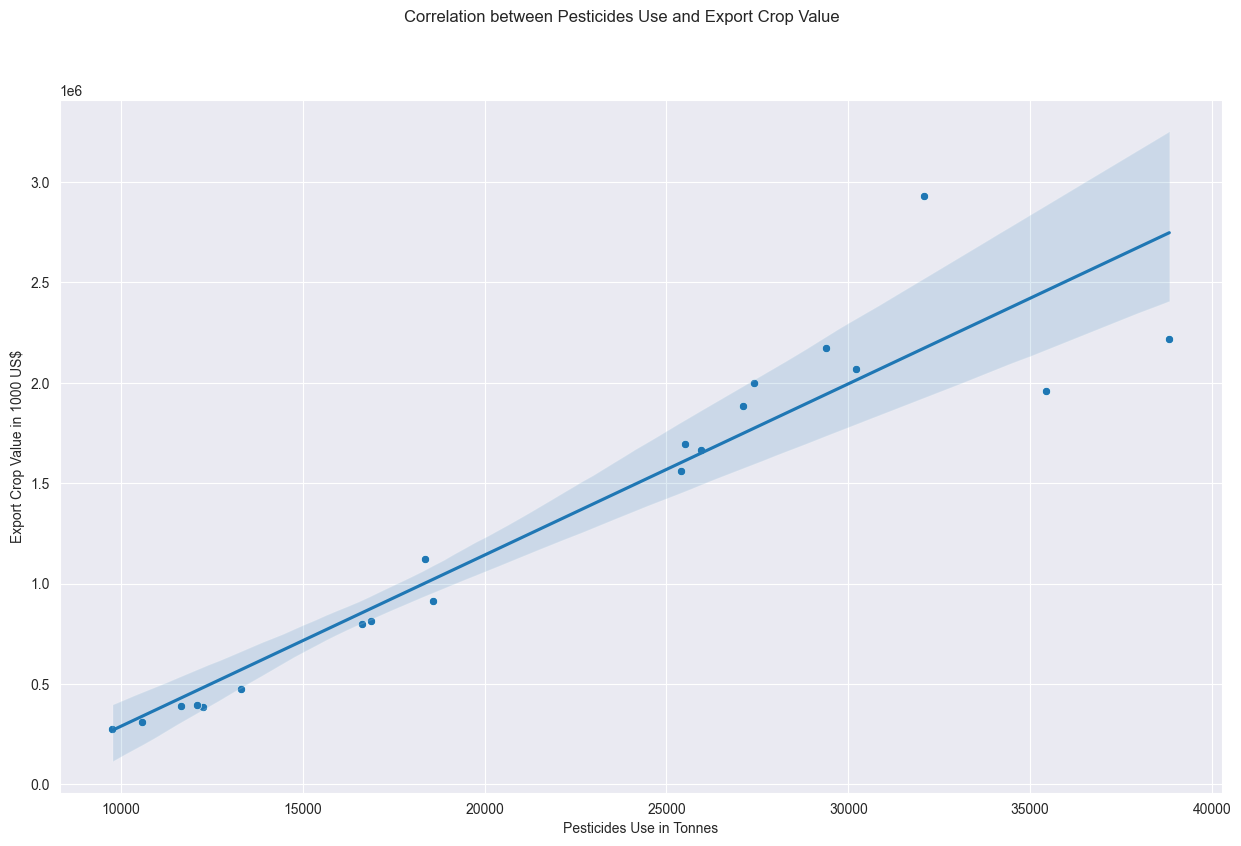

In [1196]:
# Plot the correlation between pesticides use and export crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Pesticides Use and Export Crop Value")
temp = merged_df.groupby('Year').agg({
    'Total Pesticides Use in Tonnes': 'mean',
    'Total Export Crop Value in 1000 US$': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

sns.scatterplot(data=temp, x='Total Pesticides Use in Tonnes', y='Total Export Crop Value in 1000 US$', ax=ax)
sns.regplot(data=temp, x='Total Pesticides Use in Tonnes', y='Total Export Crop Value in 1000 US$', ax=ax, scatter=False) # Line of best fit
plt.xlabel("Pesticides Use in Tonnes")
plt.ylabel("Export Crop Value in 1000 US$")
plt.show()

### 4.5 Crop Value Analysis

In this section, I will perform exploratory data analysis on the crop value data (both import and export). I will explore the following:
- Mean crop value over the years for all countries by crop type
- Distribution of crop value (non-zero values only)
- Crop value correlation with crop yield
- Frequency of harmonised items

In [1197]:
# Prepare the data for analysis
crop_value_exports_mean = crop_value_exports_df.groupby(['Year', 'Harmonised Item'])['Total Export Crop Value in 1000 US$'].mean()
crop_value_imports_mean = crop_value_imports_df.groupby(['Year', 'Harmonised Item'])['Total Import Crop Value in 1000 US$'].mean()
non_zero_crop_value_exports = crop_value_exports_df[crop_value_exports_df['Total Export Crop Value in 1000 US$'] > 0]
non_zero_crop_value_imports = crop_value_imports_df[crop_value_imports_df['Total Import Crop Value in 1000 US$'] > 0]

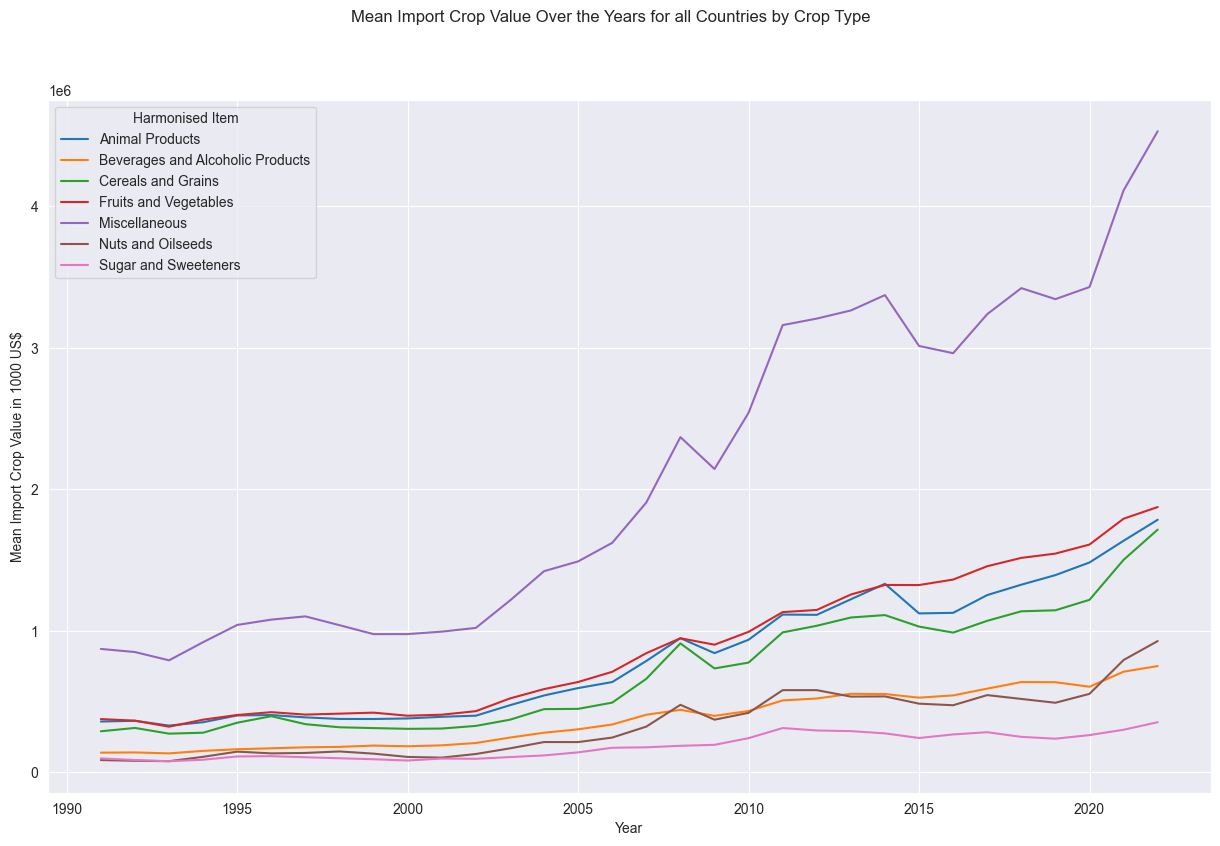

In [1198]:
# Plot the mean import crop value over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Mean Import Crop Value Over the Years for all Countries by Crop Type")

crop_value_imports_mean.unstack().plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Import Crop Value in 1000 US$")
plt.show()

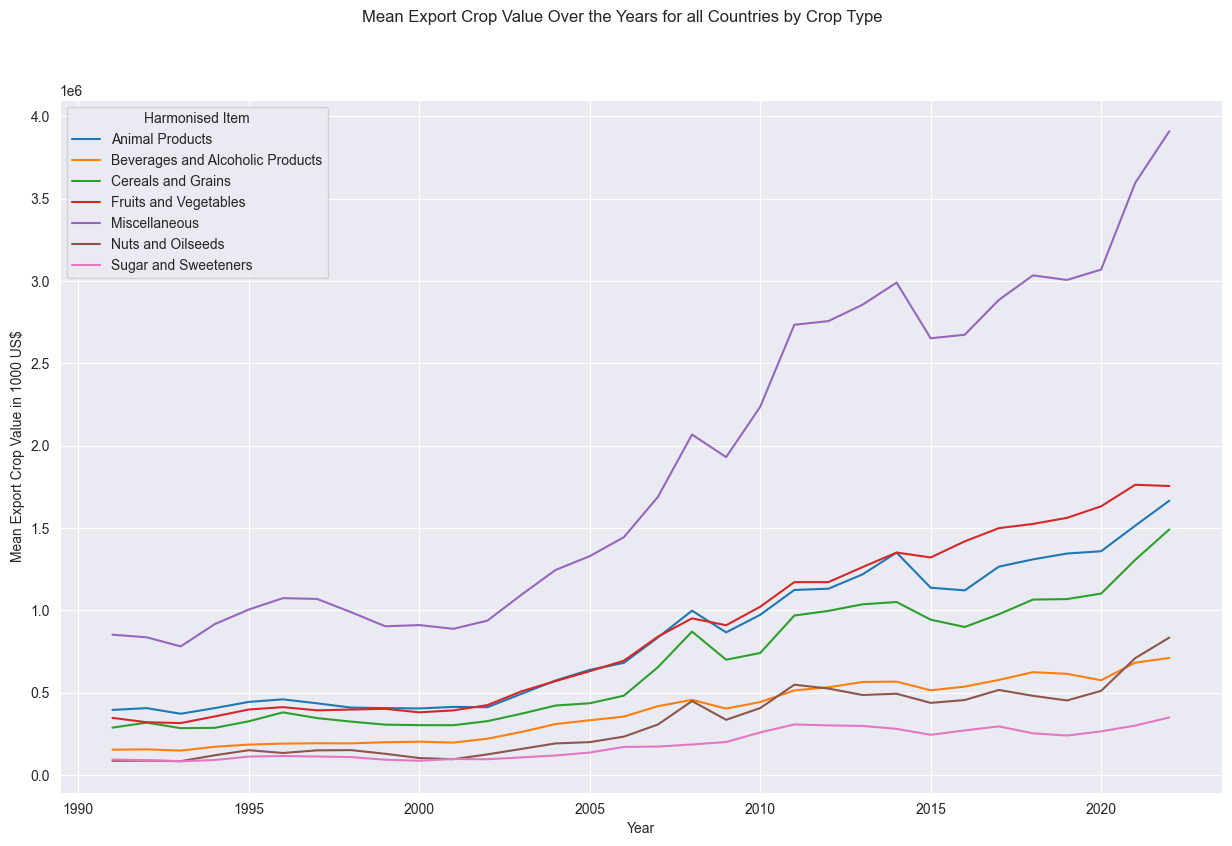

In [1199]:
# Plot the mean export crop value over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Mean Export Crop Value Over the Years for all Countries by Crop Type")

crop_value_exports_mean.unstack().plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Export Crop Value in 1000 US$")
plt.show()

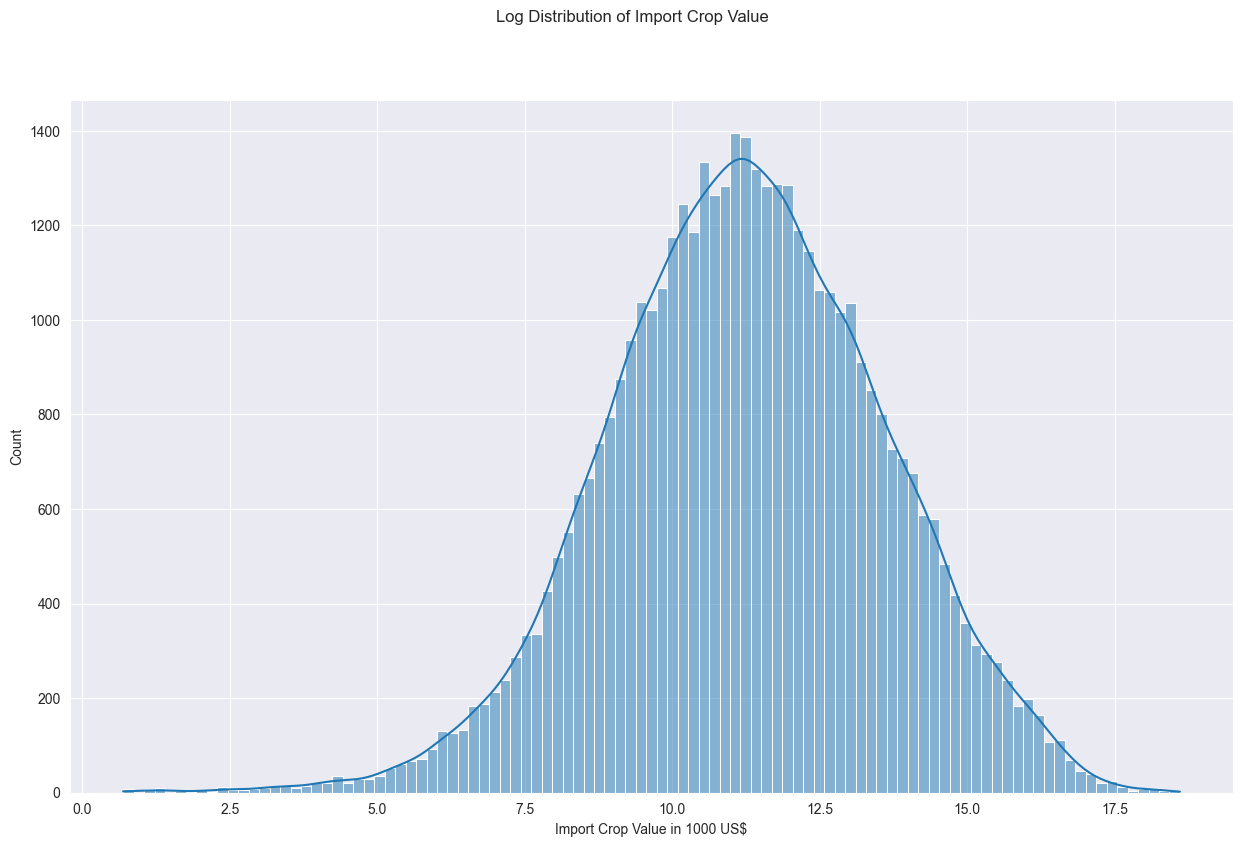

In [1200]:
# Plot the log1p distribution of import crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Log Distribution of Import Crop Value")

sns.histplot(np.log1p(non_zero_crop_value_imports['Total Import Crop Value in 1000 US$']), kde=True, ax=ax)
plt.xlabel("Import Crop Value in 1000 US$")
plt.show()

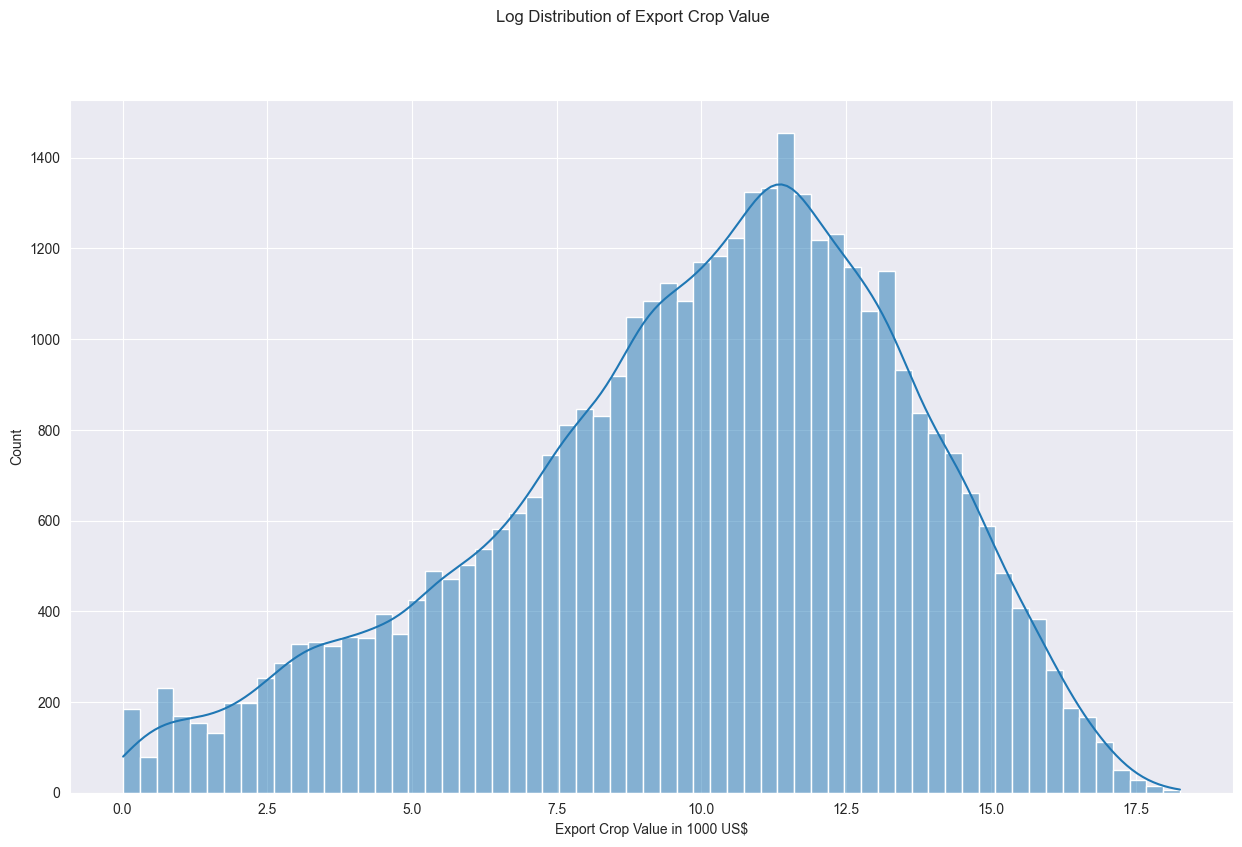

In [1201]:
# Plot the log1p distribution of export crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Log Distribution of Export Crop Value")

sns.histplot(np.log1p(non_zero_crop_value_exports['Total Export Crop Value in 1000 US$']), kde=True, ax=ax)
plt.xlabel("Export Crop Value in 1000 US$")
plt.show()

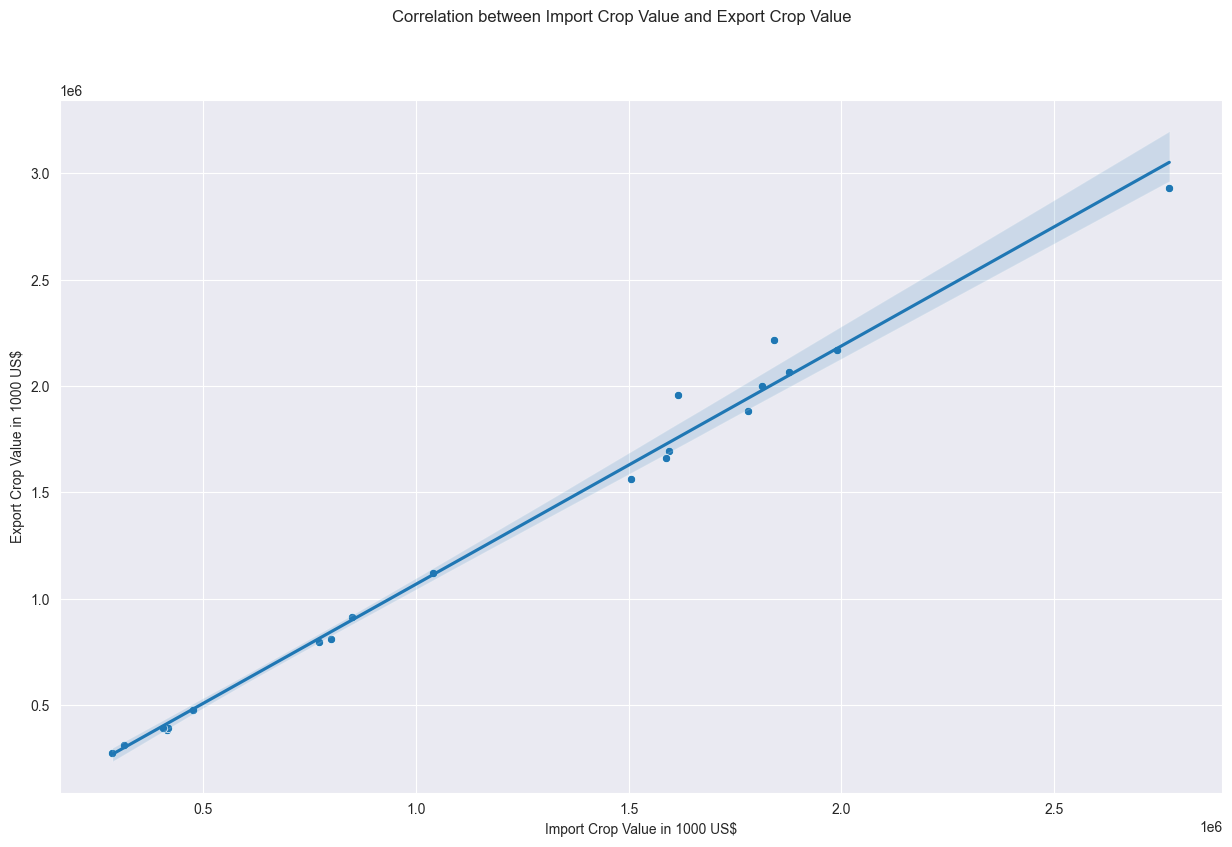

In [1202]:
# Plot the correlation between import crop value and export crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Import Crop Value and Export Crop Value")
temp = merged_df.groupby('Year').agg({
    'Total Import Crop Value in 1000 US$': 'mean',
    'Total Export Crop Value in 1000 US$': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

sns.scatterplot(data=temp, x='Total Import Crop Value in 1000 US$', y='Total Export Crop Value in 1000 US$', ax=ax)
sns.regplot(data=temp, x='Total Import Crop Value in 1000 US$', y='Total Export Crop Value in 1000 US$', ax=ax, scatter=False) # Line of best fit
plt.xlabel("Import Crop Value in 1000 US$")
plt.ylabel("Export Crop Value in 1000 US$")
plt.show()

C:\Users\tomna\AppData\Local\Temp\ipykernel_68052\1462921276.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')


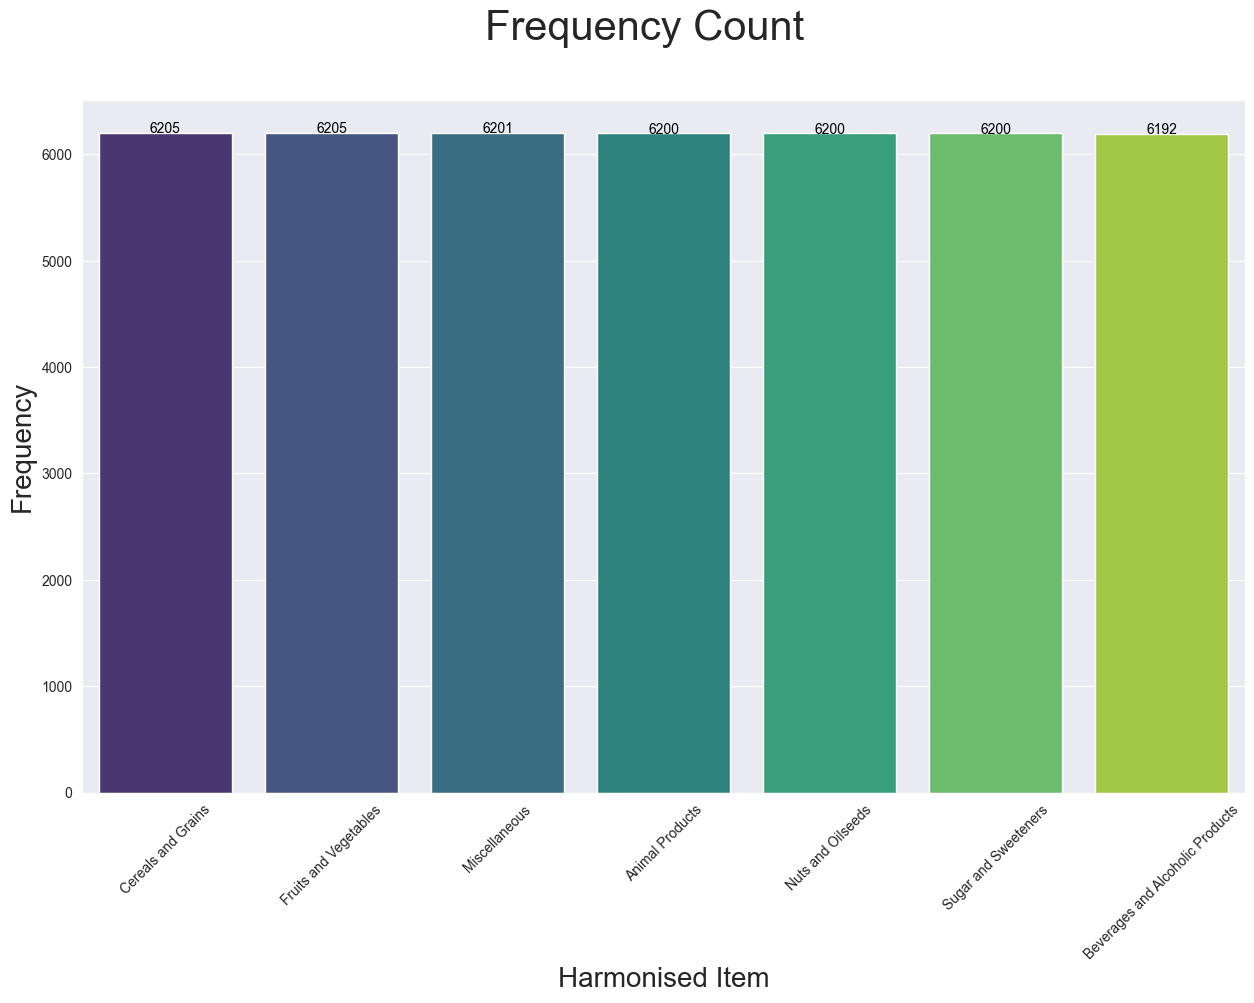

In [1203]:
# Count the values and reset the index
temp = crop_value_imports_df['Harmonised Item'].value_counts().reset_index()
temp.columns = ['Harmonised Item', 'Frequency']  # Correctly naming the columns for clarity

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Frequency Count', size=30)

# Using renamed columns
graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')

# Adding text labels on bars
for index, row in temp.iterrows():
    graph.text(index, row['Frequency'], row['Frequency'], color='black', ha="center")

plt.xlabel('Harmonised Item', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(rotation=45) # Rotating the x-axis labels for better visibility

plt.show()

C:\Users\tomna\AppData\Local\Temp\ipykernel_68052\3809287263.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')


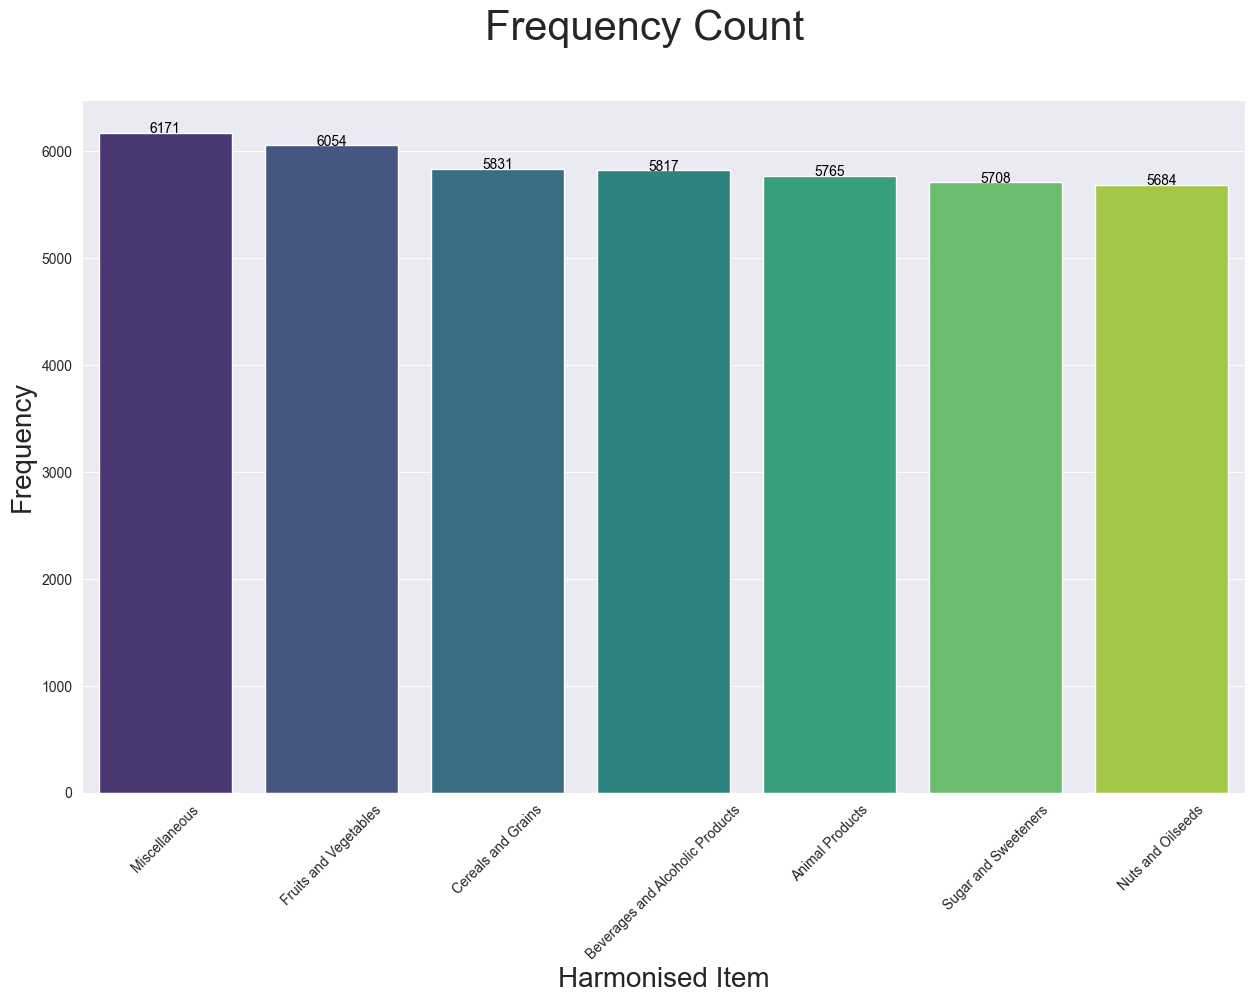

In [1204]:
# Count the values and reset the index
temp = crop_value_exports_df['Harmonised Item'].value_counts().reset_index()
temp.columns = ['Harmonised Item', 'Frequency']  # Correctly naming the columns for clarity

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Frequency Count', size=30)

# Using renamed columns
graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')

# Adding text labels on bars
for index, row in temp.iterrows():
    graph.text(index, row['Frequency'], row['Frequency'], color='black', ha="center")

plt.xlabel('Harmonised Item', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(rotation=45) # Rotating the x-axis labels for better visibility

plt.show()

## 4.6 Land Use Analysis

In this section, I will perform exploratory data analysis on the land use data. I will explore the following:
- Mean agricultural land over the years for all countries
- Total agricultural land over the years for all countries
- Agricultural land distribution
- Agricultural land correlation with crop yield

In [1205]:
# Prepare the data for analysis
land_use_mean = land_use_df.groupby('Year')['Agricultural Land in Hectares'].mean()
land_use_total = land_use_df.groupby('Year')['Agricultural Land in Hectares'].sum()
non_zero_land_use = land_use_df[land_use_df['Agricultural Land in Hectares'] > 0]

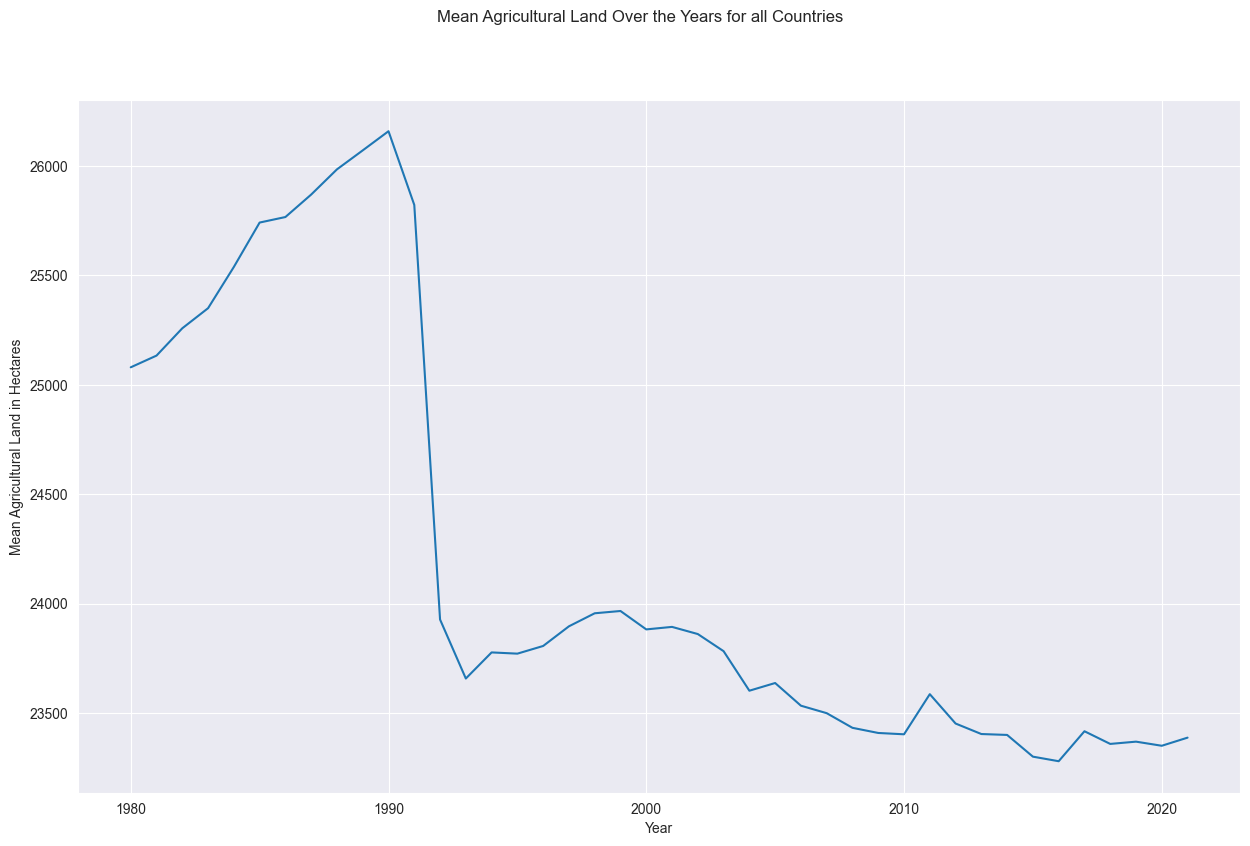

In [1206]:
# Plot the mean agricultural land over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Mean Agricultural Land Over the Years for all Countries")

land_use_mean.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Mean Agricultural Land in Hectares")
plt.show()

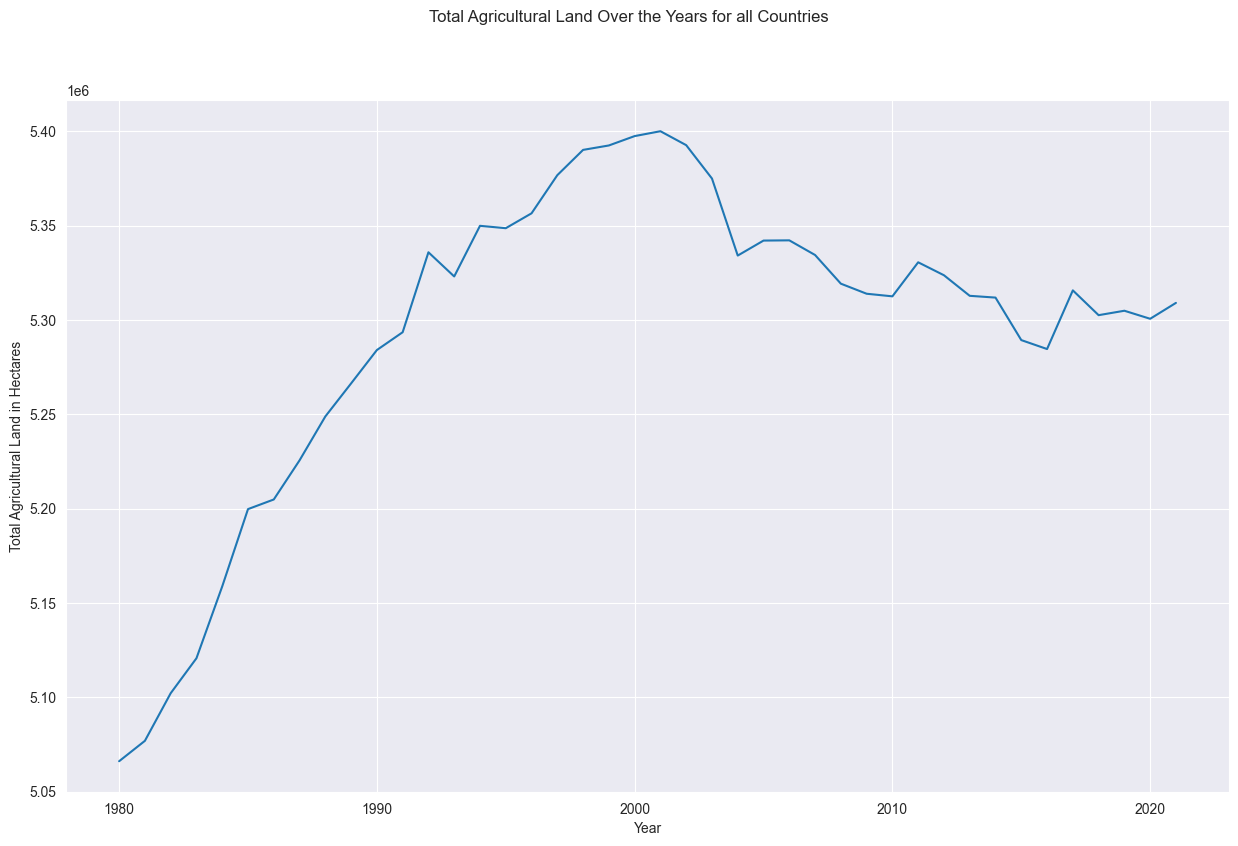

In [1207]:
# Plot the total agricultural land over the years
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Total Agricultural Land Over the Years for all Countries")

land_use_total.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Total Agricultural Land in Hectares")
plt.show()

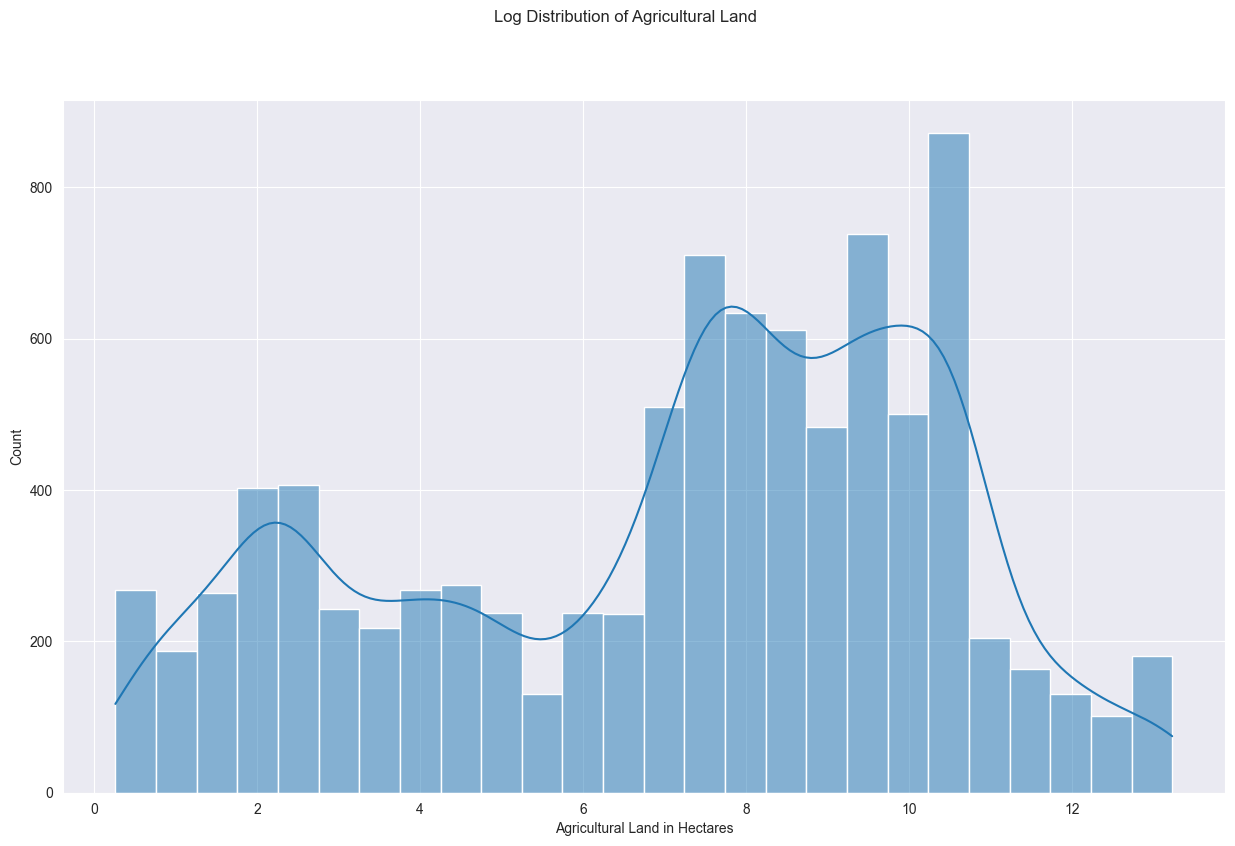

In [1208]:
# Plot the distribution of agricultural land
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Log Distribution of Agricultural Land")

sns.histplot(np.log1p(non_zero_land_use['Agricultural Land in Hectares']), kde=True, ax=ax)
plt.xlabel("Agricultural Land in Hectares")
plt.show()

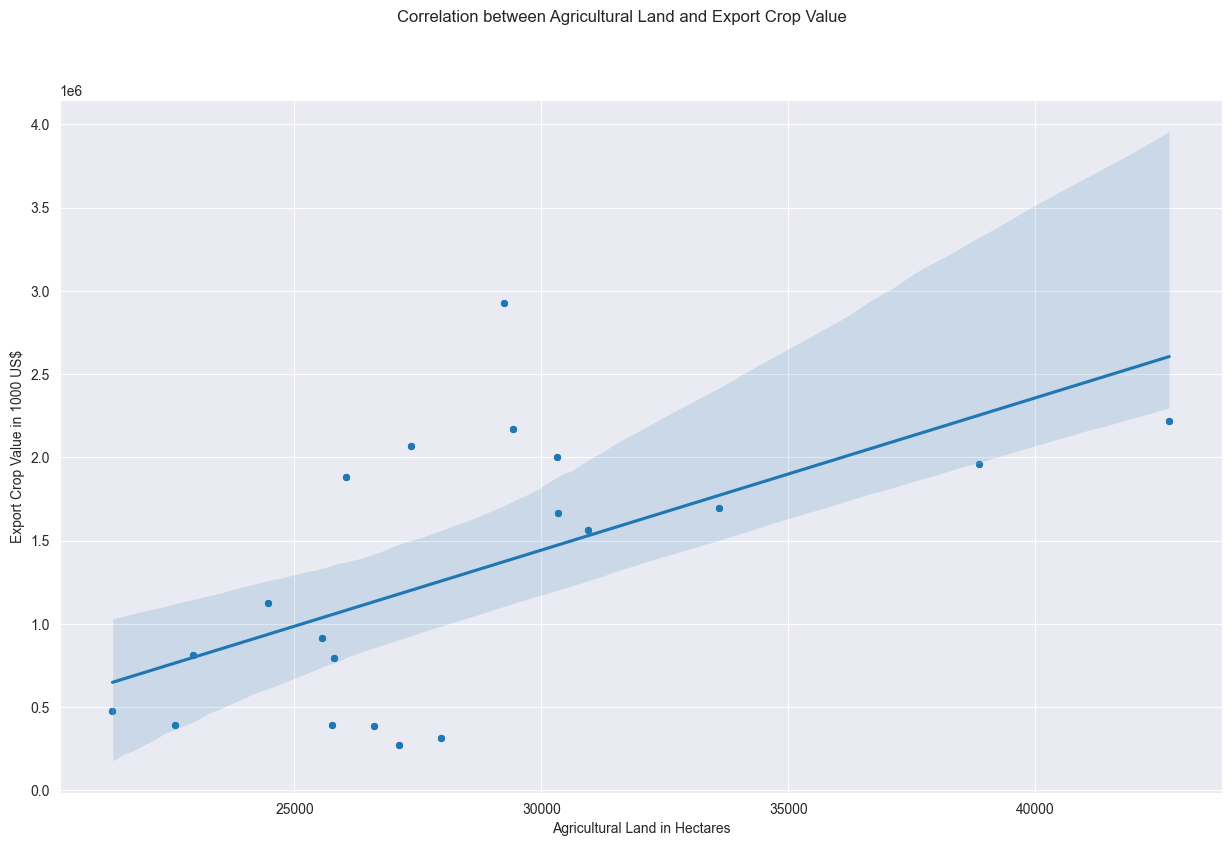

In [1209]:
# Plot the correlation between agricultural land and export crop value
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation between Agricultural Land and Export Crop Value")
temp = merged_df.groupby('Year').agg({
    'Agricultural Land in Hectares': 'mean',
    'Total Export Crop Value in 1000 US$': 'mean'
}).reset_index()  # Resetting index to turn the grouped data back into a DataFrame

sns.scatterplot(data=temp, x='Agricultural Land in Hectares', y='Total Export Crop Value in 1000 US$', ax=ax)
sns.regplot(data=temp, x='Agricultural Land in Hectares', y='Total Export Crop Value in 1000 US$', ax=ax, scatter=False) # Line of best fit

plt.xlabel("Agricultural Land in Hectares")
plt.ylabel("Export Crop Value in 1000 US$")
plt.show()

## 4.7 Merged Data Analysis

In this section, I will perform exploratory data analysis on the merged data. I will explore the following:
- Frequency of harmonised items
- Correlation analysis

## 4.7.1 Frequency of Harmonised Items

C:\Users\tomna\AppData\Local\Temp\ipykernel_68052\786852473.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')


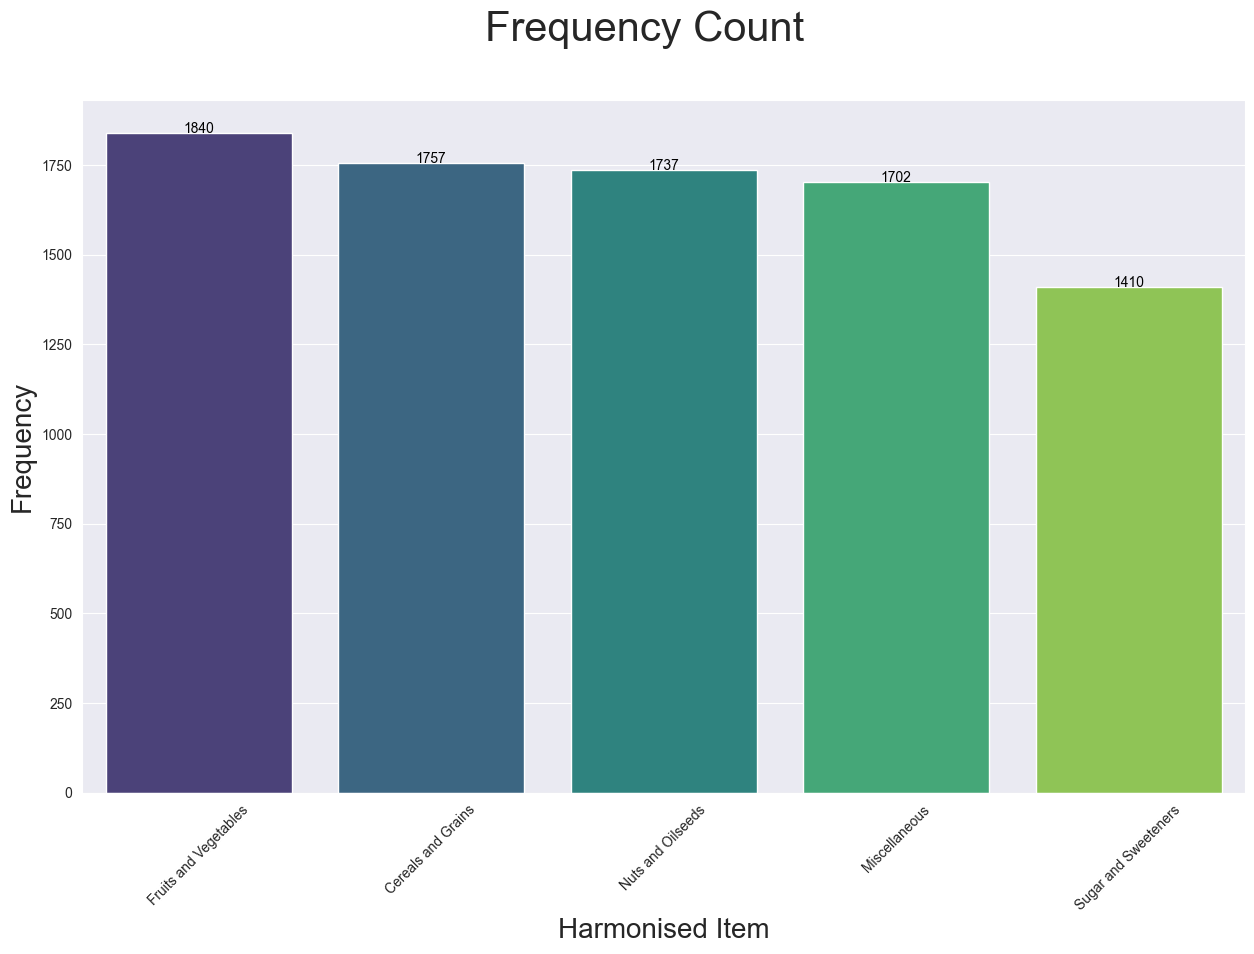

In [1210]:
# Count the values and reset the index
temp = merged_df['Harmonised Item'].value_counts().reset_index()
temp.columns = ['Harmonised Item', 'Frequency']  # Correctly naming the columns for clarity

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Frequency Count', size=30)

# Using renamed columns
graph = sns.barplot(x='Harmonised Item', y='Frequency', data=temp, ax=ax, palette='viridis')

# Adding text labels on bars
for index, row in temp.iterrows():
    graph.text(index, row['Frequency'], row['Frequency'], color='black', ha="center")   

plt.xlabel('Harmonised Item', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(rotation=45) # Rotating the x-axis labels for better visibility

plt.show()

## 4.7.2 Correlation Analysis

In this section, I will perform correlation analysis on the merged data. I will generate a correlation matrix and plot a heatmap to visualise the correlations between the variables.

In [1211]:
# Generate a correlation matrix
numeric_df = merged_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
correlation_matrix

,Year,Yield in 100g/ha,Total Export Crop Value in 1000 US$,Total Import Crop Value in 1000 US$,Temperature Change in Degrees Celsius,Total Pesticides Use in Tonnes,Agricultural Land in Hectares,Total Fertiliser Use in Tonnes
Year,1.000000,0.074925,0.174290,0.205743,0.423734,0.118691,0.029097,0.136932
Yield in 100g/ha,0.074925,1.000000,0.005384,0.015593,0.019770,0.093243,0.072052,0.069341
Total Export Crop Value in 1000 US$,0.174290,0.005384,1.000000,0.729646,0.048989,0.603918,0.461051,0.455291
Total Import Crop Value in 1000 US$,0.205743,0.015593,0.729646,1.000000,0.103011,0.473265,0.382416,0.413324
Temperature Change in Degrees Celsius,0.423734,0.019770,0.048989,0.103011,1.000000,-0.046194,-0.048991,-0.036543
Total Pesticides Use in Tonnes,0.118691,0.093243,0.603918,0.473265,-0.046194,1.000000,0.644944,0.579970
Agricultural Land in Hectares,0.029097,0.072052,0.461051,0.382416,-0.048991,0.644944,1.000000,0.604305
Total Fertiliser Use in Tonnes,0.136932,0.069341,0.455291,0.413324,-0.036543,0.579970,0.604305,1.000000


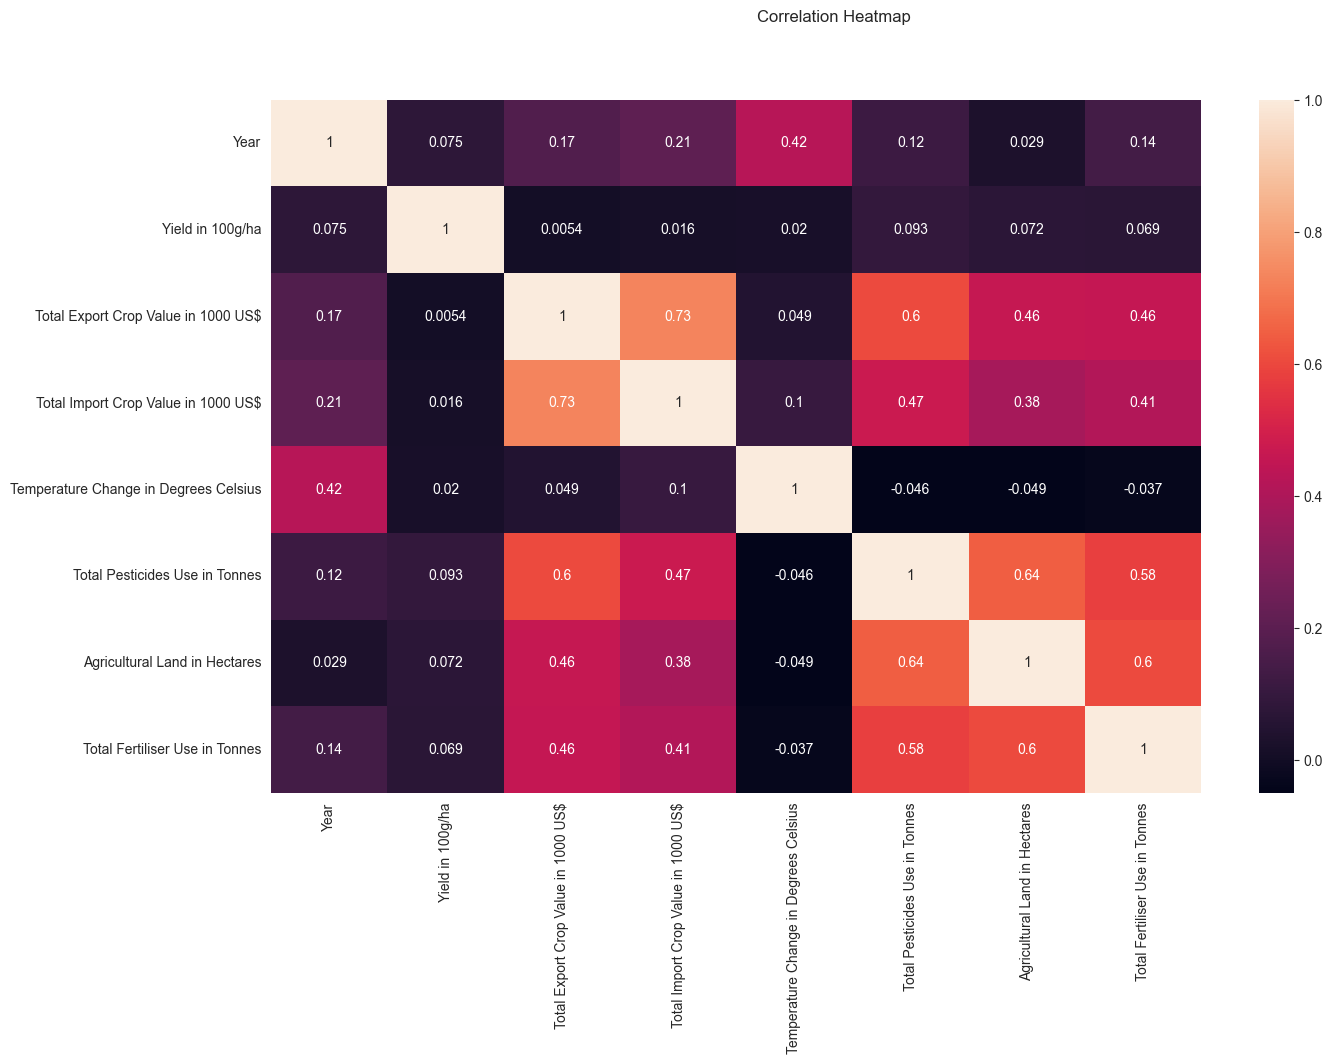

In [1212]:
# Plot a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(15,9))

plt.suptitle("Correlation Heatmap")

sns.heatmap(correlation_matrix, annot=True, ax=ax)
plt.show()

In [1213]:
# Print the correlation values with the target variable
correlation_matrix['Total Export Crop Value in 1000 US$'].sort_values(ascending=False)

Total Export Crop Value in 1000 US$      1.000000
Total Import Crop Value in 1000 US$      0.729646
Total Pesticides Use in Tonnes           0.603918
Agricultural Land in Hectares            0.461051
Total Fertiliser Use in Tonnes           0.455291
Year                                     0.174290
Temperature Change in Degrees Celsius    0.048989
Yield in 100g/ha                         0.005384
Name: Total Export Crop Value in 1000 US$, dtype: float64

In [1214]:
merged_df = merged_df.drop(columns=['Yield in 100g/ha', 'Temperature Change in Degrees Celsius']) # Drop columns with low correlation

# 5. Data Preprocessing

In this section, I will preprocess the data for machine learning. I will perform the following steps:
- Log Transform the Numeric Variables
- Remove Outliers using the Z-score method with a threshold of 3

## 5.1 Log Transform the Numeric Variables

In this section, I will log transform the numeric variables in the merged data.

In [1215]:
# Select the names of numeric columns, ensuring 'Year' is excluded
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop('Year')
# Apply np.log1p to all selected numeric columns
merged_df[numeric_cols] = merged_df[numeric_cols].apply(np.log1p)

In [1216]:
# Display the first few rows of the merged data
merged_df.describe()

,Year,Total Export Crop Value in 1000 US$,Total Import Crop Value in 1000 US$,Total Pesticides Use in Tonnes,Agricultural Land in Hectares,Total Fertiliser Use in Tonnes
count,8446.000000,8446.000000,8446.000000,8446.000000,8446.000000,8446.000000
mean,2010.036112,10.863348,12.193564,7.752582,8.532576,12.033552
std,5.297832,3.430931,1.900704,2.267331,2.197158,2.840408
min,2002.000000,0.000000,5.505332,0.506818,0.916291,0.000000
25%,2006.000000,9.203492,10.898848,6.353082,7.438251,10.550538
50%,2009.000000,11.429068,12.205517,7.765997,8.574896,12.379984
75%,2014.000000,13.148152,13.512753,9.263881,10.125365,13.853061
max,2021.000000,18.104888,17.777920,13.066804,13.010316,18.386695


## 5.2 Remove Outliers

In this section, I will remove outliers from the merged data using the Z-score method with a threshold of 3. I will remove rows with Z-scores greater than 3.

In [1217]:
import numpy as np
from scipy import stats

In [1218]:
# Calculate the Z-scores
z_scores = np.abs(stats.zscore(merged_df.select_dtypes(include=[np.number]).drop('Year', axis=1)))
# Remove rows with Z-scores greater than 3
merged_df = merged_df[(z_scores < 3).all(axis=1)]
# Display the shape of the merged data (8070, 9)
merged_df.shape

(8070, 8)

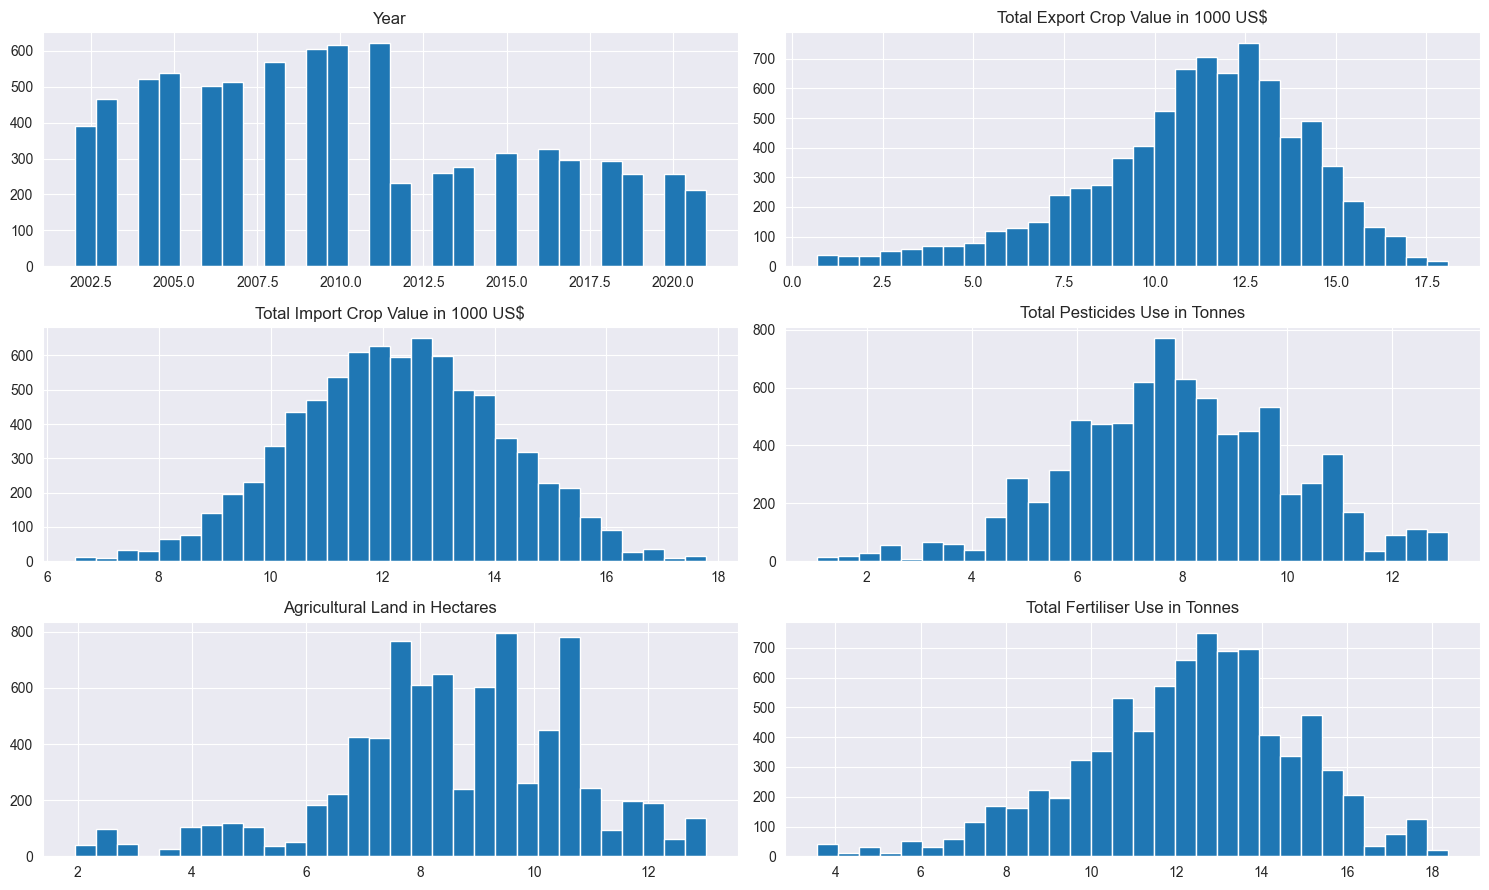

In [1219]:
# Display the distribution of the variables after removing outliers
merged_df.hist(figsize=(15, 9), bins=30) 
plt.tight_layout()
plt.show()

# 7. Multi-Layer Perceptron (MLP) Model

In this section, I will build a Multi-Layer Perceptron (MLP) model to predict the total export crop value in 1000 US$ using the merged data. I will perform the following steps:
- Split the data into features and target variable
- Split the data into training and testing sets
- Encode the categorical variables (Harmonised Item and Area)
- Scale the features
- Train the MLPRegressor
- Predict on the test set
- Evaluate the model
- Plot the results

## 7.1 Split the Data

In this section, I will split the data into features and the target variable. I will then split the data into training and testing sets.

In [1220]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

df = merged_df

# Separate the features and the target variable
X = df.drop('Total Export Crop Value in 1000 US$', axis=1)
y = df['Total Export Crop Value in 1000 US$']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 7.2 Encode the Categorical Variables

In this section, I will encode the categorical variables (Harmonised Item and Area) using the OneHotEncoder.

In [1221]:
# Apply the encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
harmonised_item_train_encoded = encoder.fit_transform(X_train[['Harmonised Item', 'Area']])
harmonised_item_test_encoded = encoder.transform(X_test[['Harmonised Item','Area']])

# Convert encoded data into a DataFrame
harmonised_item_train_df = pd.DataFrame(harmonised_item_train_encoded, columns=encoder.get_feature_names_out(), index=X_train.index)
harmonised_item_test_df = pd.DataFrame(harmonised_item_test_encoded, columns=encoder.get_feature_names_out(), index=X_test.index)

# Concatenate the encoded variables back with the original training and testing data
X_train_processed = pd.concat([X_train.drop(['Harmonised Item','Area'], axis=1), harmonised_item_train_df], axis=1)
X_test_processed = pd.concat([X_test.drop(['Harmonised Item','Area'], axis=1), harmonised_item_test_df], axis=1)

## 7.3 Scale the Features

In this section, I will scale the features using the StandardScaler.

In [1222]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

## 7.4 Train the MLPRegressor

In this section, I will train the MLPRegressor using the training data.

In [1223]:
# Initialize the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
# Train the MLPRegressor
mlp.fit(X_train_scaled, y_train)
# Predict on the test set
y_pred = mlp.predict(X_test_scaled)

## 7.5 Evaluate the Model

In this section, I will evaluate the model using the Mean Absolute Error and R^2 Score.

In [1224]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2_score = mlp.score(X_test_scaled, y_test)
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2_score}')

Mean Absolute Error: 0.41576397490990324
R^2 Score: 0.9433441361052182


## 7.6 Plot the Results

In this section, I will plot the results of the MLPRegressor model. I will use the following plots:
- Scatter plot of predicted vs actual total export crop value
- Density plot of actual vs predicted values
- Scatter plots of predicted vs actual total export crop value by harmonised item

### 7.6.1 Scatter Plot of Predicted vs Actual Total Export Crop Value

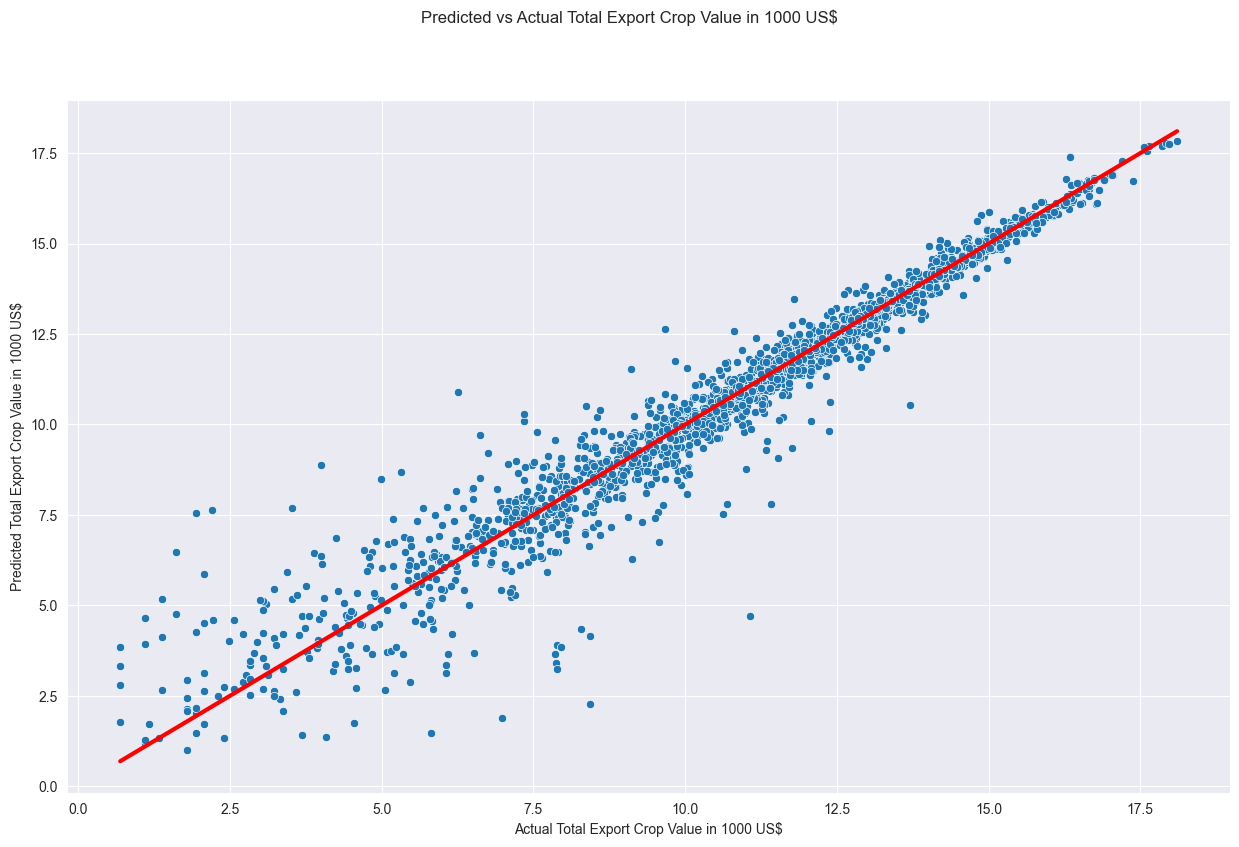

In [1225]:
# Plotting the results as a scatter plot
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Predicted vs Actual Total Export Crop Value in 1000 US$")
sns.scatterplot(x=y_test, y=y_pred, ax=ax)
# Add a line for predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=3)
plt.xlabel("Actual Total Export Crop Value in 1000 US$")
plt.ylabel("Predicted Total Export Crop Value in 1000 US$")
plt.show()

### 7.6.2 Density Plot of Actual vs Predicted Values

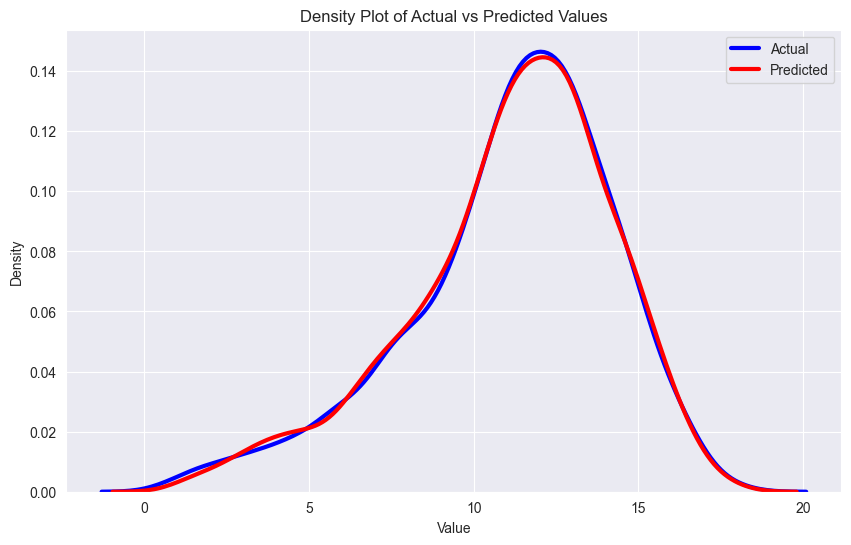

In [1226]:
# Plot the density plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual', color='blue', linewidth=3)
sns.kdeplot(y_pred, label='Predicted', color='red', linewidth=3)
plt.title('Density Plot of Actual vs Predicted Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

### 7.6.3 Scatter Plots of Predicted vs Actual Total Export Crop Value by Harmonised Item

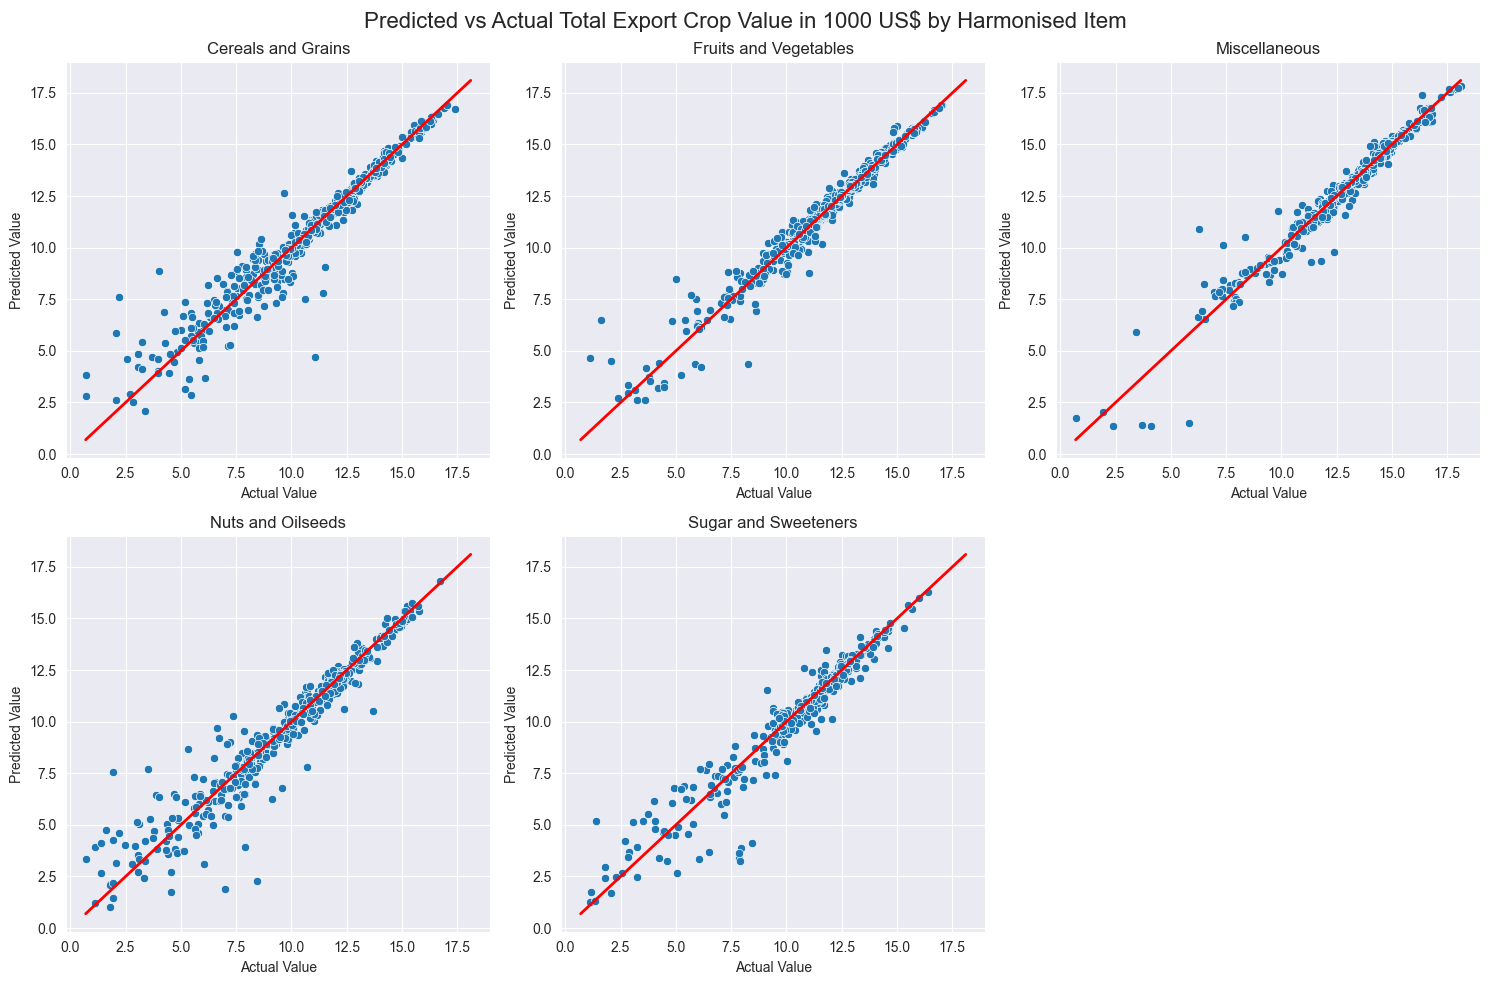

In [1227]:
# Assuming y_pred is a numpy array; convert to pandas Series with y_test index for alignment
y_pred_series = pd.Series(y_pred, index=y_test.index)

# Number of unique items
unique_items = encoder.get_feature_names_out()
# Filter out Area columns
unique_items = [item for item in unique_items if 'Area_' not in item]

n_items = len(unique_items)
cols = 3  # Number of columns in the subplot grid
rows = np.ceil(n_items / cols).astype(int)  # Number of rows in the subplot grid

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))  # Adjust the size as needed
fig.suptitle("Predicted vs Actual Total Export Crop Value in 1000 US$ by Harmonised Item", fontsize=16)

for i, item in enumerate(unique_items):
    ax = axes.flatten()[i]
    mask = X_test_processed[item] == 1
    sns.scatterplot(x=y_test[mask], y=y_pred_series[mask], ax=ax)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Identity line
    ax.set_title(item.replace('Harmonised Item_', ''))  # Adjust title to clean up item names
    ax.set_xlabel("Actual Value")
    ax.set_ylabel("Predicted Value")

# Hide any unused subplots
for j in range(i + 1, rows * cols):
    axes.flatten()[j].set_visible(False)

plt.tight_layout()
plt.show()

## 7.7 Check for Overfitting

In this section, I will check for overfitting in the MLPRegressor model by comparing the training and testing scores. If the training score is significantly higher than the testing score, it indicates overfitting.


In [1228]:
# Get the training score
training_score = mlp.score(X_train_scaled, y_train)
# Print the training and testing scores
print(f'Training Score: {training_score}')
print(f'Testing Score: {r2_score}')

Training Score: 0.9735340458104925
Testing Score: 0.9433441361052182


## 7.8 Save and Load the Model

In this section, I will save the trained MLPRegressor model to a file and load it back to make predictions.

In [1229]:
import joblib
# Save the model to a file
joblib.dump(mlp, 'mlp_model.pkl')
# Load the model from the file
loaded_model = joblib.load('mlp_model.pkl')

# Make predictions using the loaded model
y_pred_loaded = loaded_model.predict(X_test_scaled)
# Evaluate the loaded model
r2_score_loaded = loaded_model.score(X_test_scaled, y_test)
print(f'R^2 Score of Loaded Model: {r2_score_loaded}')

R^2 Score of Loaded Model: 0.9433441361052182
